# HR Analytics Project- Understanding the Attrition in HR

## Dataset Description

The dataset contains information about employee  profiles, performance, and attrition rates within a company. It includes data on employee efficiency, compensation, work culture, motivation systems, and tenure. This dataset is valuable for HR Analytics as it helps in understanding and addressing attrition issues within the organization.

### Relevance to HR Analytics:
HR Analytics involves applying data analysis to HR processes to enhance employee performance and overall return on investment. This dataset is instrumental in achieving this goal by providing insights into employee attrition patterns and factors influencing it.

### Impact of Attrition on Companies:
High employee attrition is costly, leading to expenses such as job postings, hiring, and training. It also hampers knowledge retention and can result in customer dissatisfaction due to frequent staff turnover.

### Description of the columns present in the dataset:
Age: The age of the employee.

Attrition: Whether the employee has left the company (Yes/No).

BusinessTravel: Frequency of employee's business travel (e.g., Travel_Rarely, Travel_Frequently).

DailyRate: Employee's daily rate of pay.

Department: The department in which the employee works (e.g., Sales, HR, Research & Development).

DistanceFromHome: The distance between the employee's home and workplace.

Education: Employee's educational level (1-5, with 5 being the highest).

EducationField: Field of study in education.

EmployeeCount: The count of employees (usually constant for all rows).

EmployeeNumber: A unique identifier for each employee.

EnvironmentSatisfaction: Employee's satisfaction with their work environment (1-4, with 4 being highly satisfied).

Gender: Employee's gender.

HourlyRate: Employee's hourly rate of pay.

JobInvolvement: Level of involvement in their job (1-4, with 4 being highly involved).

JobLevel: Employee's job level within the company.

JobRole: The specific role or job title of the employee.

JobSatisfaction: Employee's job satisfaction level (1-4, with 4 being highly satisfied).

MaritalStatus: Employee's marital status.

MonthlyIncome: Employee's monthly income.

MonthlyRate: Employee's monthly rate of pay.

NumCompaniesWorked: Number of companies the employee has worked for.

Over18: Whether the employee is over 18 years old (Yes/No).

OverTime: Whether the employee works overtime (Yes/No).

PercentSalaryHike: Percentage of the employee's salary hike.

PerformanceRating: Employee's performance rating (1-4, with 4 being the highest).

RelationshipSatisfaction: Employee's satisfaction with their relationships at work (1-4, with 4 being highly satisfied).

StandardHours: Standard number of working hours (usually constant for all rows).

StockOptionLevel: Level of stock options provided to the employee.

TotalWorkingYears: Total number of years the employee has worked.

TrainingTimesLastYear: Number of times the employee was trained last year.

WorkLifeBalance: Employee's perception of work-life balance (1-4, with 4 being highly balanced).

YearsAtCompany: Number of years the employee has worked at the current company.

YearsInCurrentRole: Number of years the employee has been in their current role.

YearsSinceLastPromotion: Number of years since the employee's last promotion.

YearsWithCurrManager: Number of years the employee has worked with their current manager.

### Objective:
The objective of this project is to predict the employee attrition.

#### Features:
Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

#### Target:
 Attrition

## Importing libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Saving and loading models
import joblib

## Importing Dataset 

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('HR_Analytics_Employee_Attrition_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
# Display last 5 rows of the dataframe
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Exploratory Data Analysis

In [5]:
# Display the shape of the dataframe
df.shape

(1470, 35)

Dataframe has 1470 rows and 35 columns.

In [6]:
# Display the names of the columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Display the datatypes of the columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Columns with data type 'int64':

Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

Columns with data type 'object':

Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

In [8]:
# Checking for the null values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values present in the dataset.

In [9]:
# Checking for the unique values present in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Based on the number of unique values present in each column, there are some columns should be considered categorical but they have int datatype such as: 

Education (5 unique values) 

EmployeeCount (1 unique values)

EnvironmentSatisfication (4 nuique values)

JobInvolvement (4 unique values)

JobLevel (5 unique values)

JobSatisfication (4 unique values)

NumCompaniesWorked (10 unique values)

PerformanceRating (2 unique Values)

RelationshipSatisfication (4 unique values)

WorkLifeBalance (4 unique values)

StockOptionLevel (4 unique values)

TrainingTimesLastYear (7 unique values)

Thsese columns have int datatype but have categorical data.

In [10]:
# List of columns which should have categorical data but have datatype 'int'
columns = ['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
           'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 
          'TrainingTimesLastYear']

In [11]:
# Converting datatype of above mentioned columns to 'object' datatype for simplicity
for i in columns:
    df[i] = df[i].astype(object)

In [12]:
# Again checking the datatypes of the columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount               object
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked          object
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

In [13]:
# Separating numerical columns and categorical columns for further data analysis
numerical_columns = [] # List for storing columns name having numerical data
categorical_columns = [] # List for storing columns name having categorical data

for i in df.columns:
    if df[i].dtypes == 'int64':
        numerical_columns.append(i)
    elif df[i].dtypes == 'object':
        categorical_columns.append(i)

In [14]:
# Display numerical columns list
numerical_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
# Display categorical columns list
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [16]:
# Display the lengths of both the lists
print("No. numerical columns:", len(numerical_columns))
print("No. categorical_columns:", len(categorical_columns))

No. numerical columns: 14
No. categorical_columns: 21


In [17]:
# Display the unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Age :
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


DailyRate :
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  713  134  

Each column contains a wide array of distinct and diverse values.

In [18]:
# Display the value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
206

Value count for each column contains a wide array of distinct and diverse values.

In [19]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Attrition :
['Yes' 'No']


BusinessTravel :
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Department :
['Sales' 'Research & Development' 'Human Resources']


Education :
[2 1 4 3 5]


EducationField :
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


EmployeeCount :
[1]


EnvironmentSatisfaction :
[2 3 4 1]


Gender :
['Female' 'Male']


JobInvolvement :
[3 2 4 1]


JobLevel :
[2 1 3 4 5]


JobRole :
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


JobSatisfaction :
[4 2 3 1]


MaritalStatus :
['Single' 'Married' 'Divorced']


NumCompaniesWorked :
[8 1 6 9 0 4 5 2 7 3]


Over18 :
['Y']


OverTime :
['Yes' 'No']


PerformanceRating :
[3 4]


RelationshipSatisfaction :
[1 4 2 3]


StockOptionLevel :
[0 1 3 2]


TrainingTimesLastYear :
[0 3 2 5 1 4 6]


WorkLifeBalance :
[1 3 2 4]




In [20]:
# Display value count for each unique value present in the categorical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


1    1470
Name: EmployeeCount, dtype: int64


3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing D

In [21]:
# Checking for the duplicated rows in the datframe
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [22]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   object
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [23]:
# Display summary statistics of the dataframe
df.describe().T

count          mean          std     min      25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.00   
EmployeeNumber           1470.0   1024.865306   602.024335     1.0   491.25   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.00   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.00   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.00   
StandardHours            1470.0     80.000000     0.000000    80.0    80.00   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.00   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.00   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
EmployeeNumber            1020.5   1555.75   2068.0  
HourlyRate                  66.0     83.75    100.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
PercentSalaryHike           14.0     18.00     25.0  
StandardHours               80.0     80.00     80.0  
TotalWorkingYears           10.0     15.00     40.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

Here's a concise interpretation of the summary statistics in the context of each column:

#### Age:
Mean age is approximately 36.92 years.
Age ranges from 18 to 60 years.
The majority of employees (25% to 75%) fall between the ages of 30 to 43.

#### DailyRate:
The average daily rate is approximately 802.49 units.
Daily rates vary from 102 to 1499 units.
Most employees (25% to 75%) have daily rates between 465 to 1157 units.

#### DistanceFromHome:
On average, employees live about 9.19 units away from work.
The distance from home ranges from 1 to 29 units.
The middle 50% of employees have home distances between 2 to 14 units.

#### EmployeeNumber:

Employee numbers vary from 1 to 2068.
There is no meaningful statistical measure for this column as it represents unique identifiers for employees.

#### HourlyRate:
The average hourly rate is around 65.89 units.
Hourly rates range from 30 to 100 units.
Most employees (25% to 75%) have hourly rates between 48 to 83.75 units.

#### MonthlyIncome:
The average monthly income is approximately 6502.93 units.
Monthly incomes range from 1009 to 19999 units.
The middle 50% of employees earn between 2911 to 8379 units per month.

#### MonthlyRate:
The average monthly rate is about 14313.10 units.
Monthly rates vary from 2094 to 26999 units.
There is a broad range of monthly rates, with 25% to 75% falling between 8047 to 20461.50 units.

#### PercentSalaryHike:
The average salary hike percentage is approximately 15.21%.
Salary hikes range from 11% to 25%.
Most employees (25% to 75%) have salary hikes between 12% to 18%.

#### StandardHours:
Standard working hours are consistently 80 hours, with no variation.

#### TotalWorkingYears:
On average, employees have approximately 11.28 years of total working experience.
Total working years range from 0 to 40 years.
The middle 50% of employees have 6 to 15 years of total working experience.

#### YearsAtCompany:
The average tenure at the company is about 7.01 years.
Tenure varies from 0 to 40 years.
Most employees (25% to 75%) have tenures between 3 to 9 years.

#### YearsInCurrentRole:
On average, employees have spent approximately 4.23 years in their current roles.
This duration ranges from 0 to 18 years.
The middle 50% of employees have spent 2 to 7 years in their current roles.

#### YearsSinceLastPromotion:
The average time since the last promotion is about 2.19 years.
This duration ranges from 0 to 15 years.
Most employees (25% to 75%) have durations between 0 to 3 years.

#### YearsWithCurrManager:
On average, employees have worked with their current managers for about 4.12 years.
This duration ranges from 0 to 17 years.
The middle 50% of employees have worked with their current managers for 2 to 7 years.

In [24]:
# Display summary statistics for categorical (object) columns
df.describe(include = 'O').T

count unique                     top  freq
Attrition                 1470      2                      No  1233
BusinessTravel            1470      3           Travel_Rarely  1043
Department                1470      3  Research & Development   961
Education                 1470      5                       3   572
EducationField            1470      6           Life Sciences   606
EmployeeCount             1470      1                       1  1470
EnvironmentSatisfaction   1470      4                       3   453
Gender                    1470      2                    Male   882
JobInvolvement            1470      4                       3   868
JobLevel                  1470      5                       1   543
JobRole                   1470      9         Sales Executive   326
JobSatisfaction           1470      4                       4   459
MaritalStatus             1470      3                 Married   673
NumCompaniesWorked        1470     10                       1   521
Over18                    1470      1                       Y  1470
OverTime                  1470      2                      No  1054
PerformanceRating         1470      2                       3  1244
RelationshipSatisfaction  1470      4                       3   459
StockOptionLevel          1470      4                       0   631
TrainingTimesLastYear     1470      7                       2   547
WorkLifeBalance           1470      4                       3   893

Here's a summary of the statistics for the categorical columns:

#### Attrition:
There are 1470 instances.
There are 2 unique values.
The most frequent value is "No" with a frequency of 1233.

#### BusinessTravel:
There are 1470 instances.
There are 3 unique values.
The most frequent value is "Travel_Rarely" with a frequency of 1043.

#### Department:
There are 1470 instances.
There are 3 unique values.
The most frequent department is "Research & Development" with a frequency of 961.

#### Education:
There are 1470 instances.
There are 5 unique values.
The most common education level is "3" with a frequency of 572.

#### EducationField:
There are 1470 instances.
There are 6 unique values.
The most frequent field is "Life Sciences" with a frequency of 606.

#### EmployeeCount:
There are 1470 instances, and all have the same value of 1.

#### EnvironmentSatisfaction:
There are 1470 instances.
There are 4 unique values.
The most common level of environment satisfaction is "3" with a frequency of 453.

#### Gender:
There are 1470 instances.
There are 2 unique values.
The most frequent gender is "Male" with a frequency of 882.

#### JobInvolvement:
There are 1470 instances.
There are 4 unique values.
The most common job involvement level is "3" with a frequency of 868.

#### JobLevel:
There are 1470 instances.
There are 5 unique values.
The most frequent job level is "1" with a frequency of 543.

#### JobRole:
There are 1470 instances.
There are 9 unique values.
The most common job role is "Sales Executive" with a frequency of 326.

#### JobSatisfaction:
There are 1470 instances.
There are 4 unique values.
The most common job satisfaction level is "4" with a frequency of 459.

#### MaritalStatus:
There are 1470 instances.
There are 3 unique values.
The most frequent marital status is "Married" with a frequency of 673.

#### NumCompaniesWorked:
There are 1470 instances.
There are 10 unique values.
The most frequent number of companies worked for is "1" with a frequency of 521.

#### Over18:
There are 1470 instances, and all have the same value of "Y".

#### OverTime:
There are 1470 instances.
There are 2 unique values.
The most common response to overtime is "No" with a frequency of 1054.

#### PerformanceRating:
There are 1470 instances.
There are 2 unique values.
The most frequent performance rating is "3" with a frequency of 1244.

#### RelationshipSatisfaction:
There are 1470 instances.
There are 4 unique values.
The most common relationship satisfaction level is "3" with a frequency of 459.

#### StockOptionLevel:
There are 1470 instances.
There are 4 unique values.
The most frequent stock option level is "0" with a frequency of 631.

#### TrainingTimesLastYear:
There are 1470 instances.
There are 7 unique values.
The most common number of training times last year is "2" with a frequency of 547.

#### WorkLifeBalance:
There are 1470 instances.
There are 4 unique values.
The most common work-life balance level is "3" with a frequency of 893.

## Data Visualization 

In [25]:
sns.set(style = 'whitegrid')

### Univariate Analysis

#### Count Plot

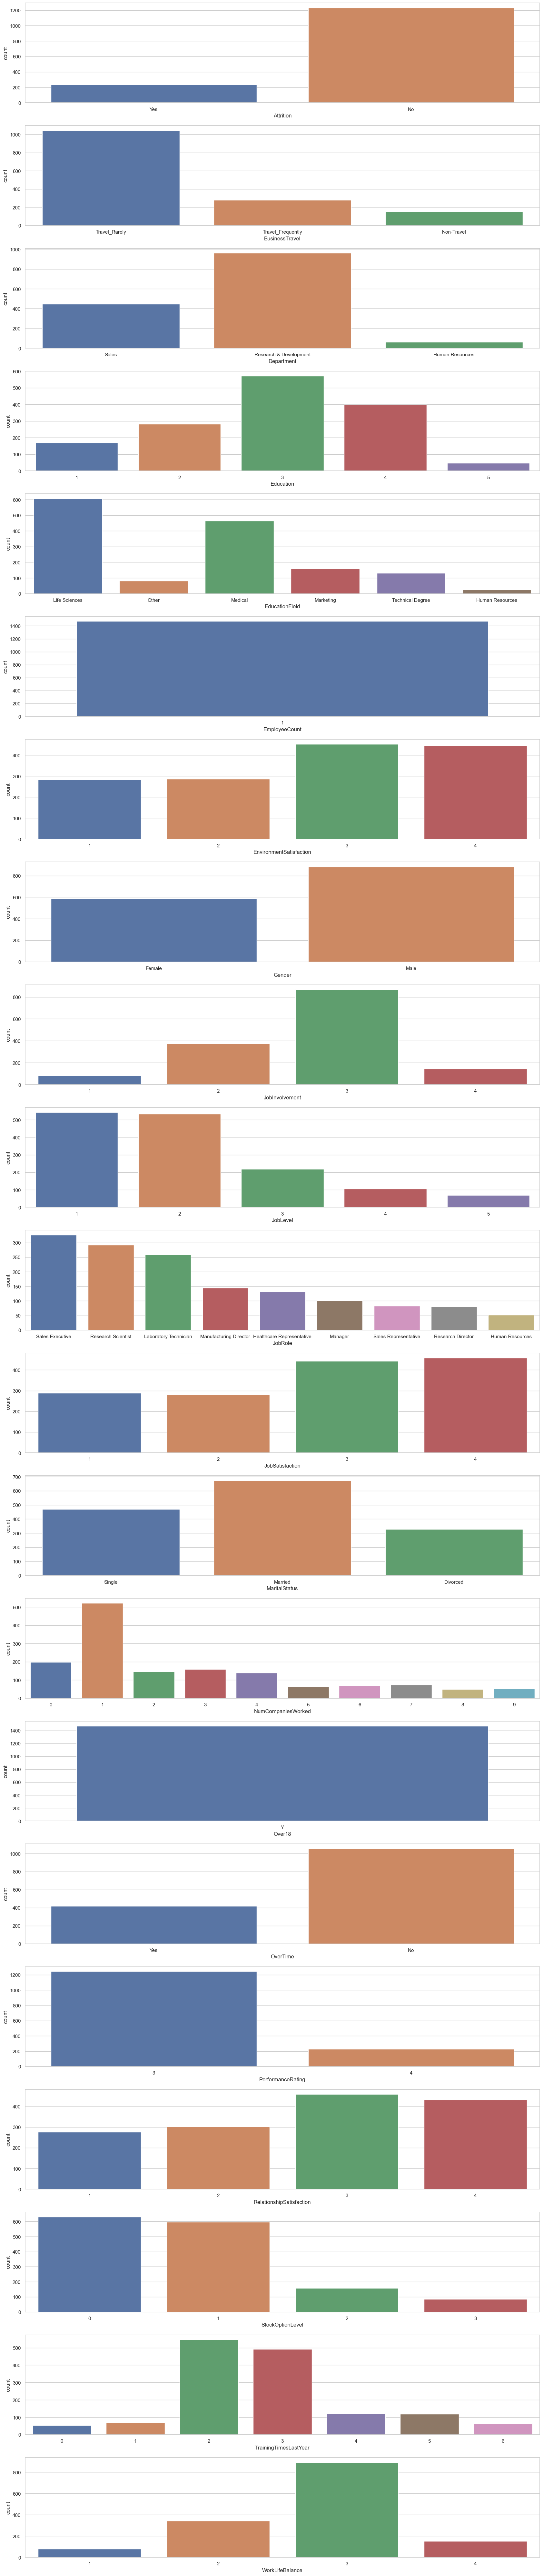

In [26]:
# Univariate analysis using Count plot for categorical columns
rows = 21
columns = 1
plt.figure(figsize = (17, 80))

for i in range(0, len(categorical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[categorical_columns[i]]) 
    plt.tight_layout()

plt.show()

Count plots for categorical columns showing count of each unique values present in the categorical columns.

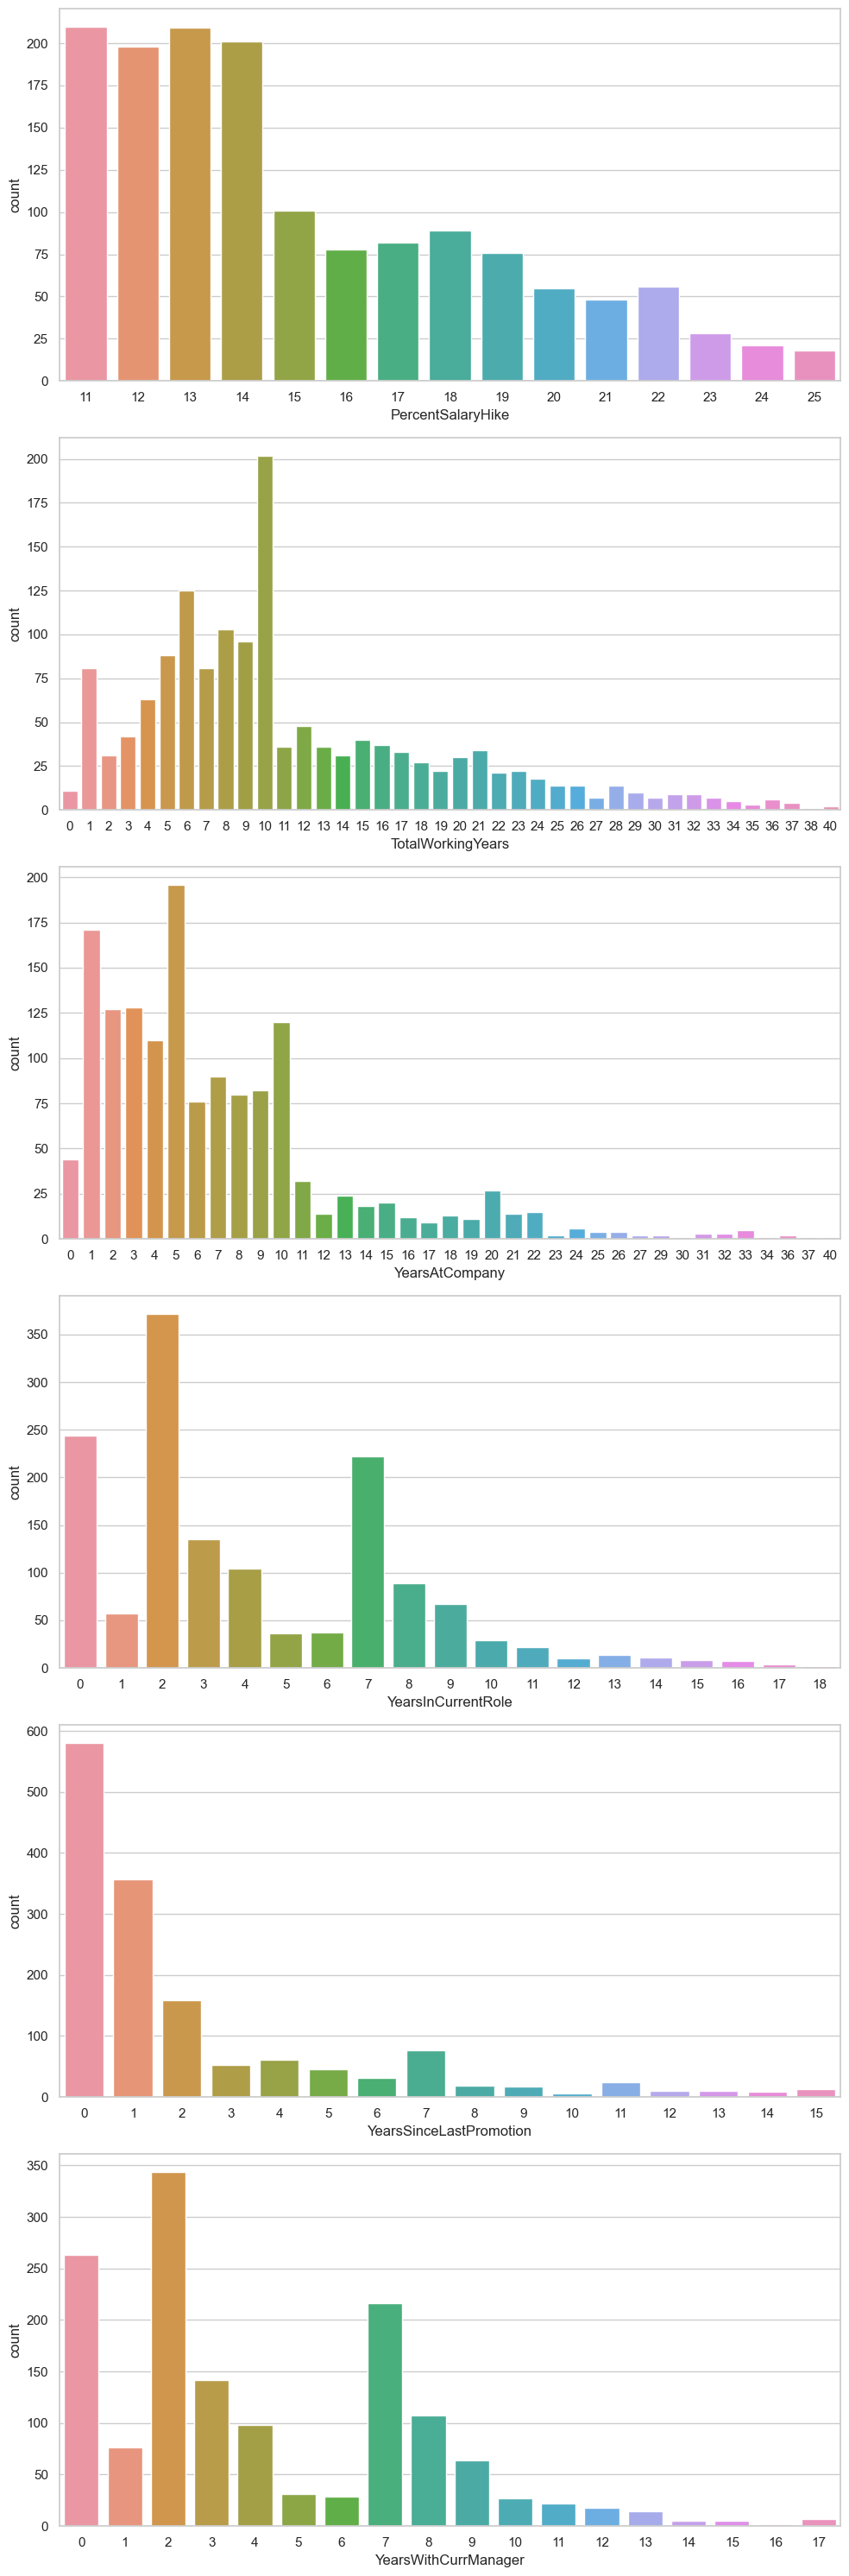

In [27]:
# Univariate analysis using count plot for selected numerical columns
selected_numerical_columns = ['PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager']
rows = 6
columns = 1
plt.figure(figsize = (10, 30))

for i in range(0, len(selected_numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[selected_numerical_columns[i]]) 
    plt.tight_layout()

plt.show()

Count plots for selected numerical columns showing count of each unique values present in the numerical column.

#### Histogram

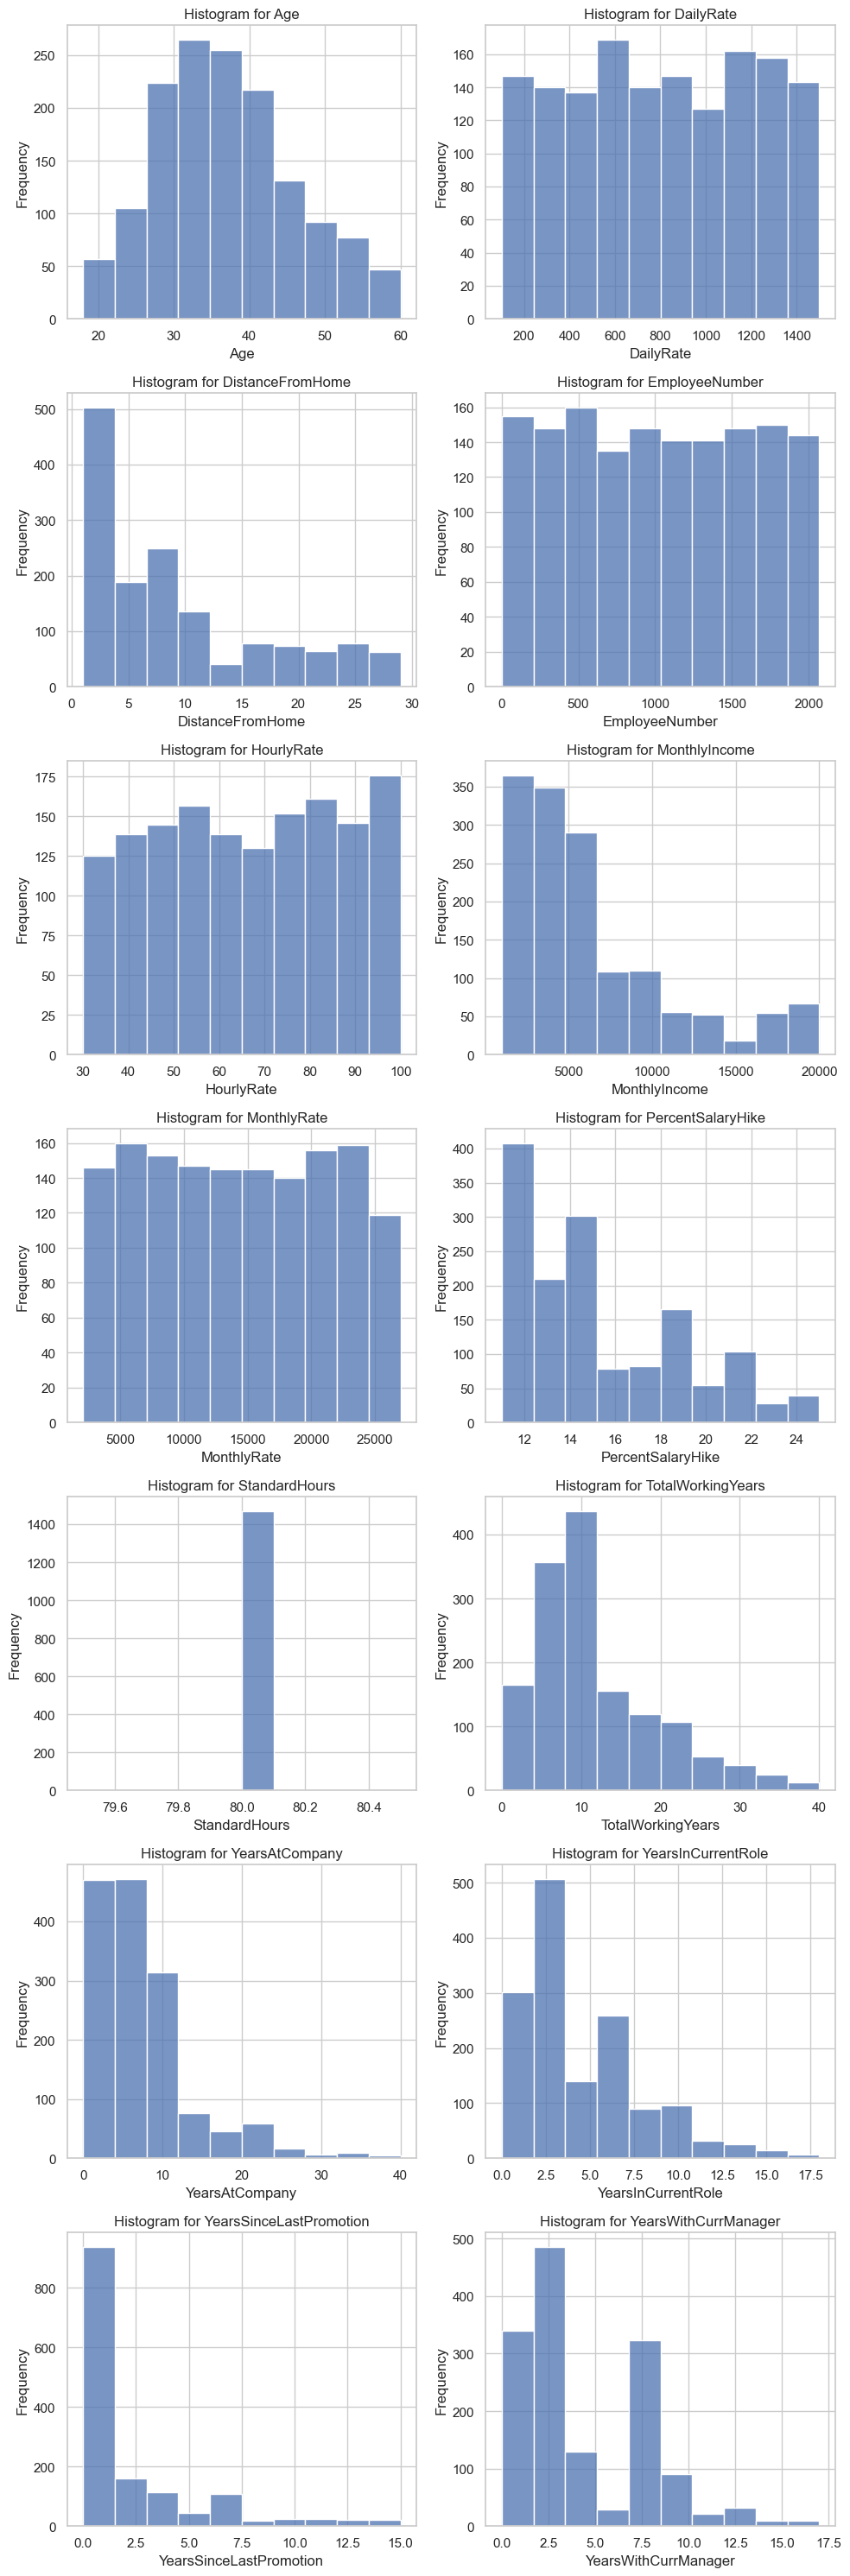

In [28]:
# Univariate analysis using Histogram for numerical columns
rows = 7
columns = 2
plt.figure(figsize = (10, 30))

for i in range(0, len(numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[numerical_columns[i]], bins = 10) 
    plt.title("Histogram for " + numerical_columns[i]) 
    plt.xlabel(numerical_columns[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

Histogrms for numerical columns showing frequency distributions of values in specific ranges.

#### Violin Plot

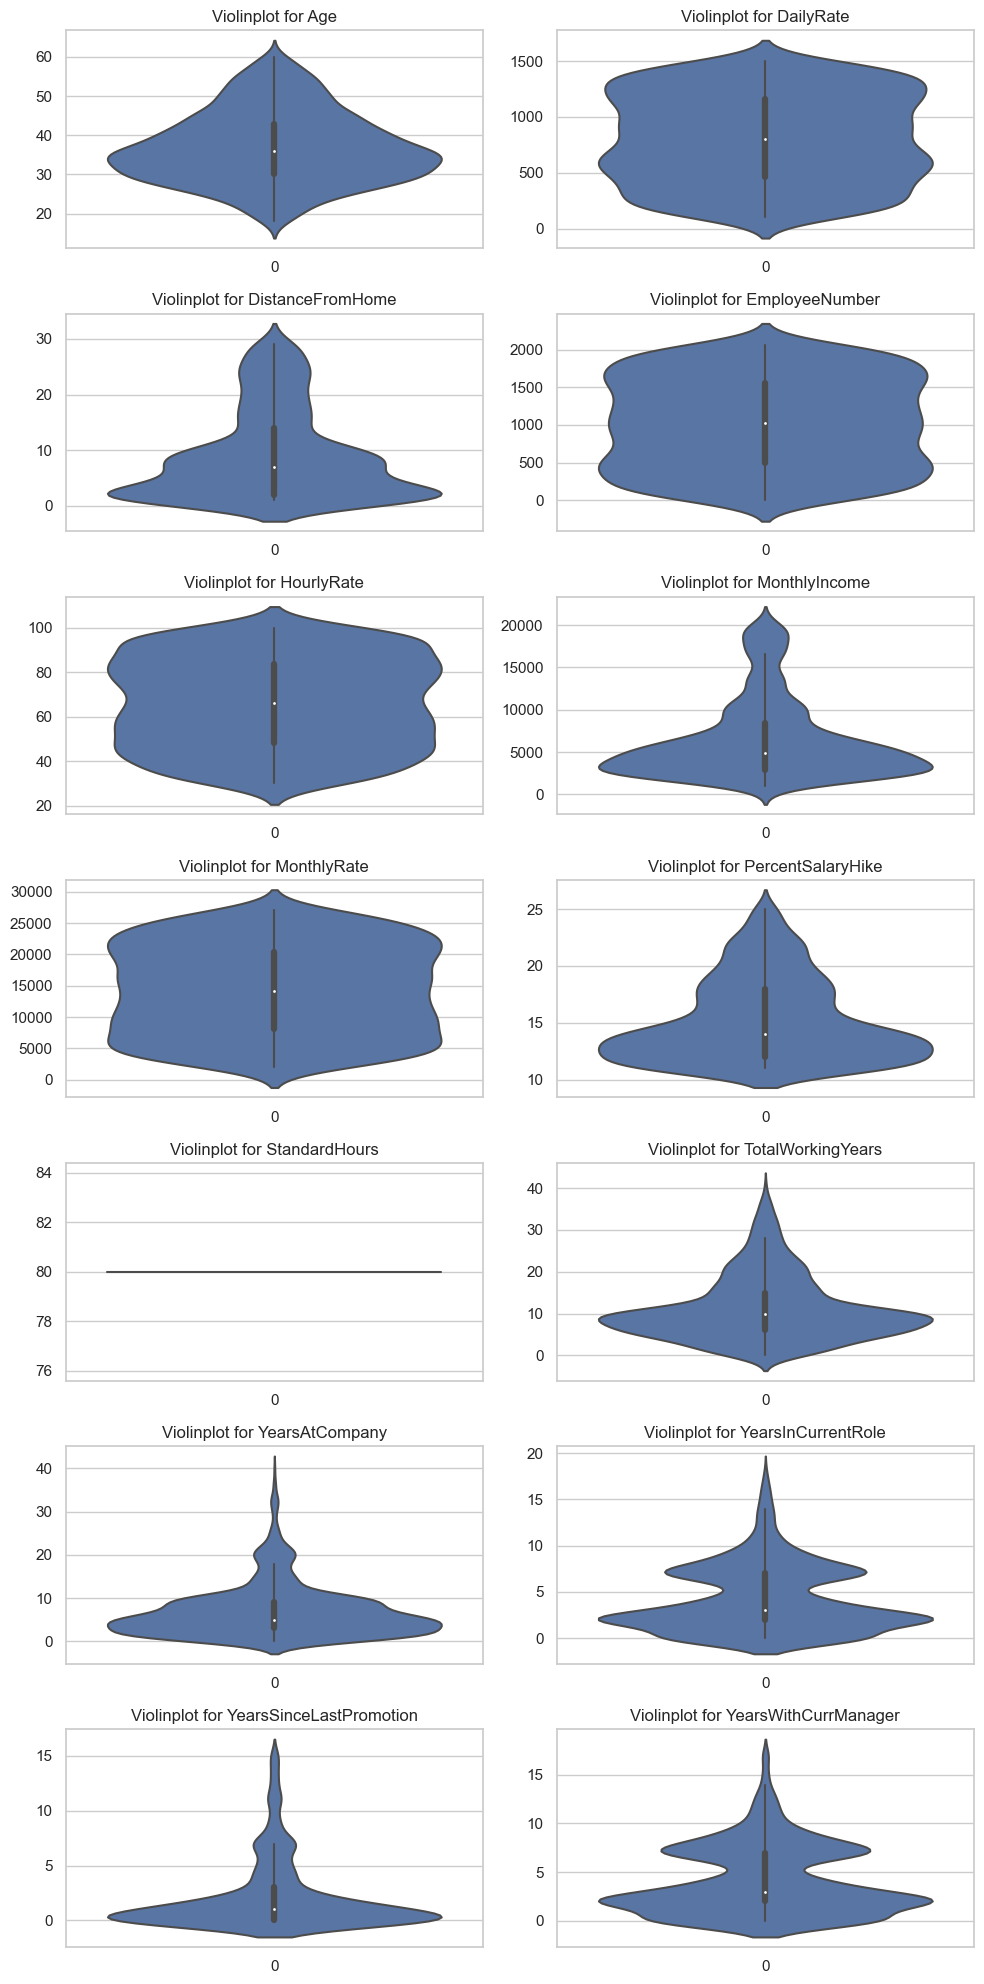

In [29]:
# Univariate analysis using Violin plot for numerical columns
rows = 7
columns = 2
plt.figure(figsize=(10, 20))

for i in range(0, len(numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.violinplot(data = df[numerical_columns[i]])
    plt.title("Violinplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

Violin plots for numerical columns showing distribution of numerical data.

### Bivariate Analysis 

#### Count Plot

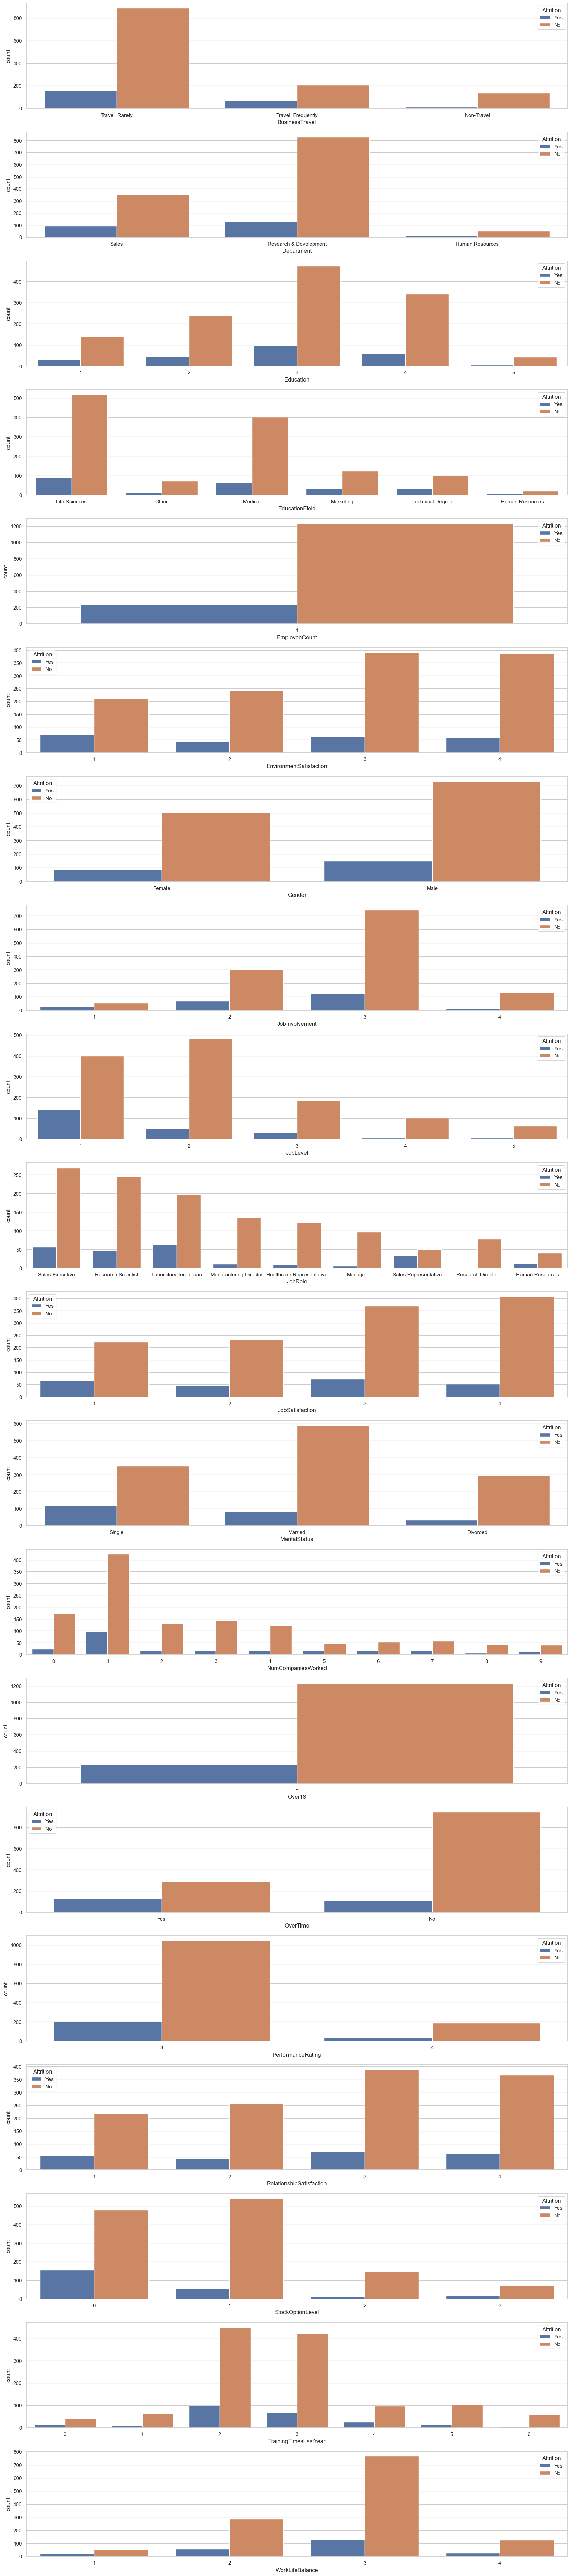

In [30]:
# Bivariate Analysis using Count plot for categorical columns using 'Attrition'
rows = 21
columns = 1
plt.figure(figsize = (17, 80))

for i in range(0, len(categorical_columns)):
    if categorical_columns[i] == 'Attrition':
        continue
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[categorical_columns[i]], hue = df['Attrition']) 
    plt.tight_layout()

plt.show()

Countplots visualize the distribution of employee attrition across unique values within categorical columns.

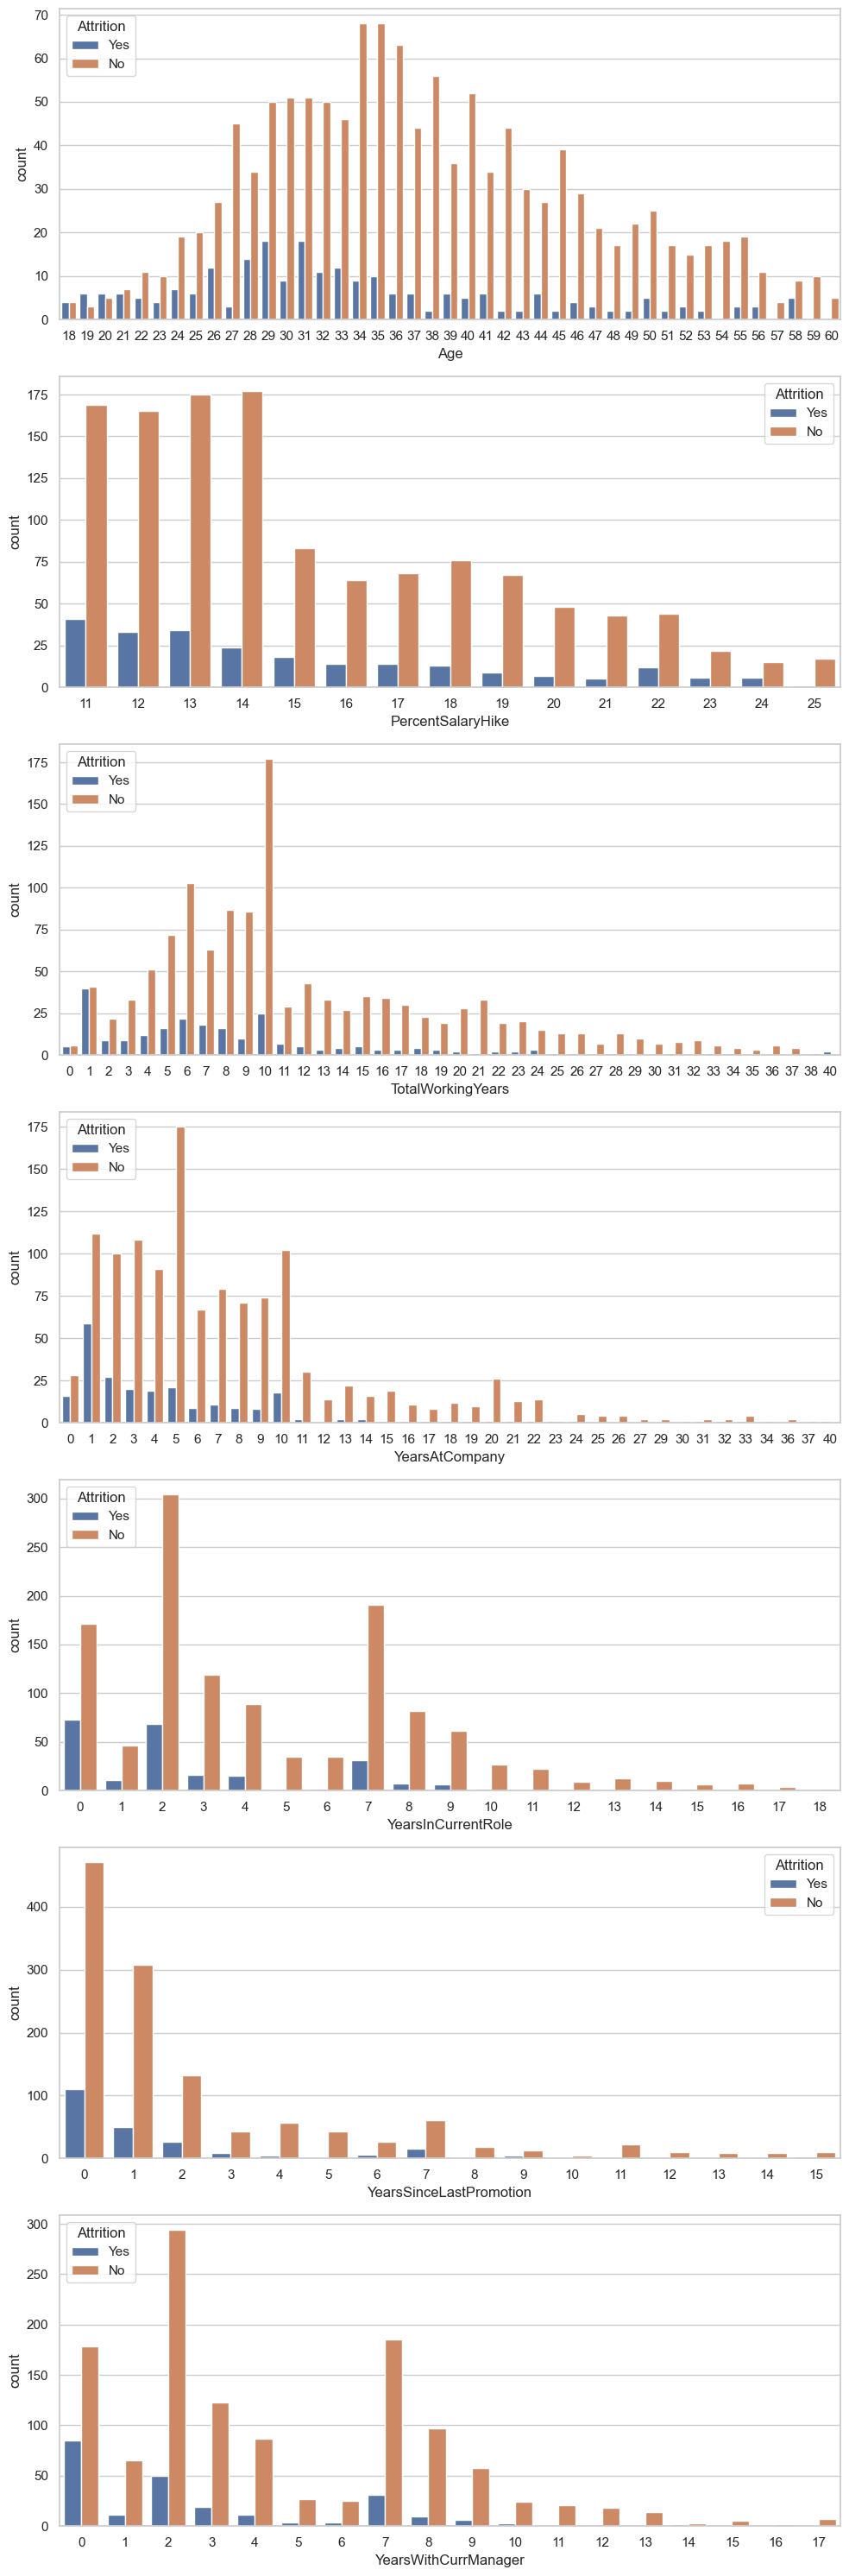

In [31]:
# Bivariate Analysis using Count plot for selected numerical columns using 'Attrition'
selected_numerical_columns = ['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager']
rows = 7
columns = 1
plt.figure(figsize = (10, 30))

for i in range(0, len(selected_numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[selected_numerical_columns[i]], hue = df['Attrition']) 
    plt.tight_layout()

plt.show()

Countplots visualize the distribution of employee attrition across unique values within numerical columns.

#### Bar Graph

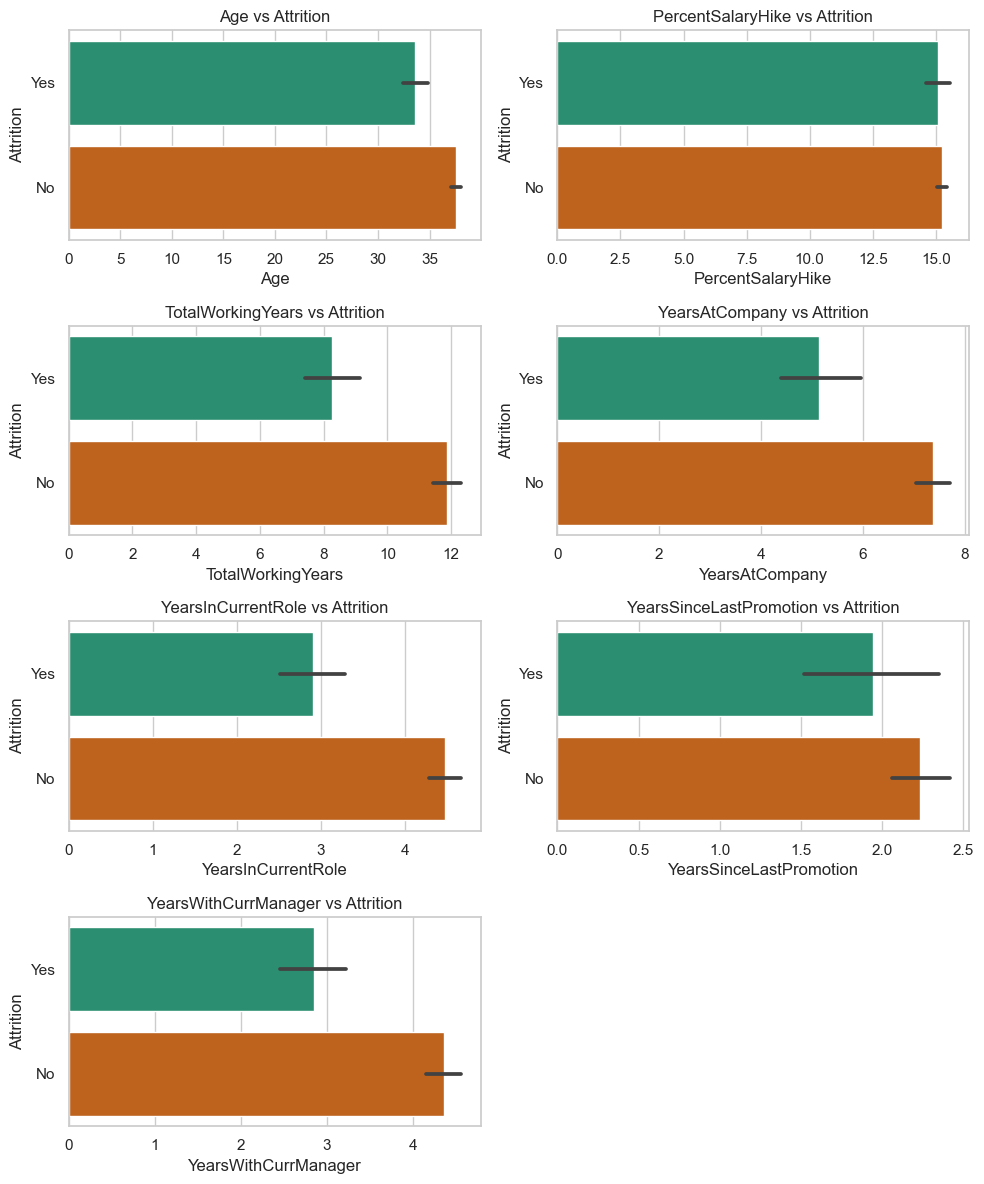

In [32]:
# Bivariate analysis using Bar graph for selected numerical columns vs target variable
selected_numerical_columns = ['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager']
rows = 4
columns = 2
plt.figure(figsize=(10, 12))

for i in range(0, len(selected_numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x = df[selected_numerical_columns[i]], y = df['Attrition'], palette = 'Dark2')  
    plt.title(selected_numerical_columns[i] + " vs Attrition")
    plt.tight_layout()
plt.show()

Bar graphs visually illustrate the relationship between each numerical feature and the target variable 'Attrition'. These graphs help reveal how each numerical variable influences with the attrition of employees.

#### Line Plot

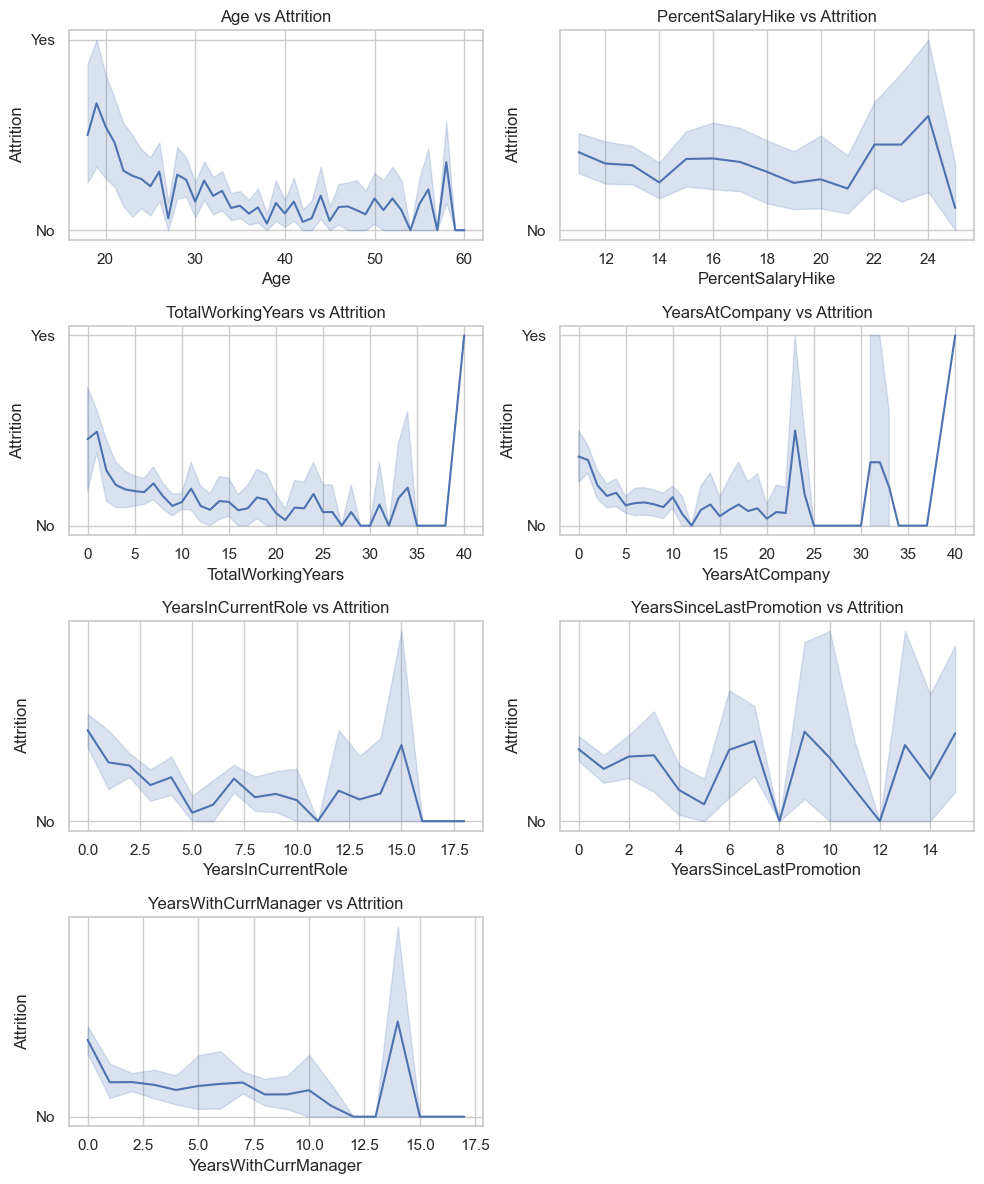

In [33]:
# Bivariate analysis using line plot for selected numerical columns vs target variable
selected_numerical_columns = ['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager']
rows = 4
columns = 2
plt.figure(figsize=(10, 12))

for i in range(0, len(selected_numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.lineplot(x = df[selected_numerical_columns[i]], y = df['Attrition'], palette = 'Dark2')  
    plt.title(selected_numerical_columns[i] + " vs Attrition")
    plt.tight_layout()
plt.show()

Line plots visually depict the relationship between each numerical feature and the target variable 'Attrition' by showing trends and patterns in the data over a continuous range of values.

#### Pair Plot 

<Figure size 1000x1200 with 0 Axes>

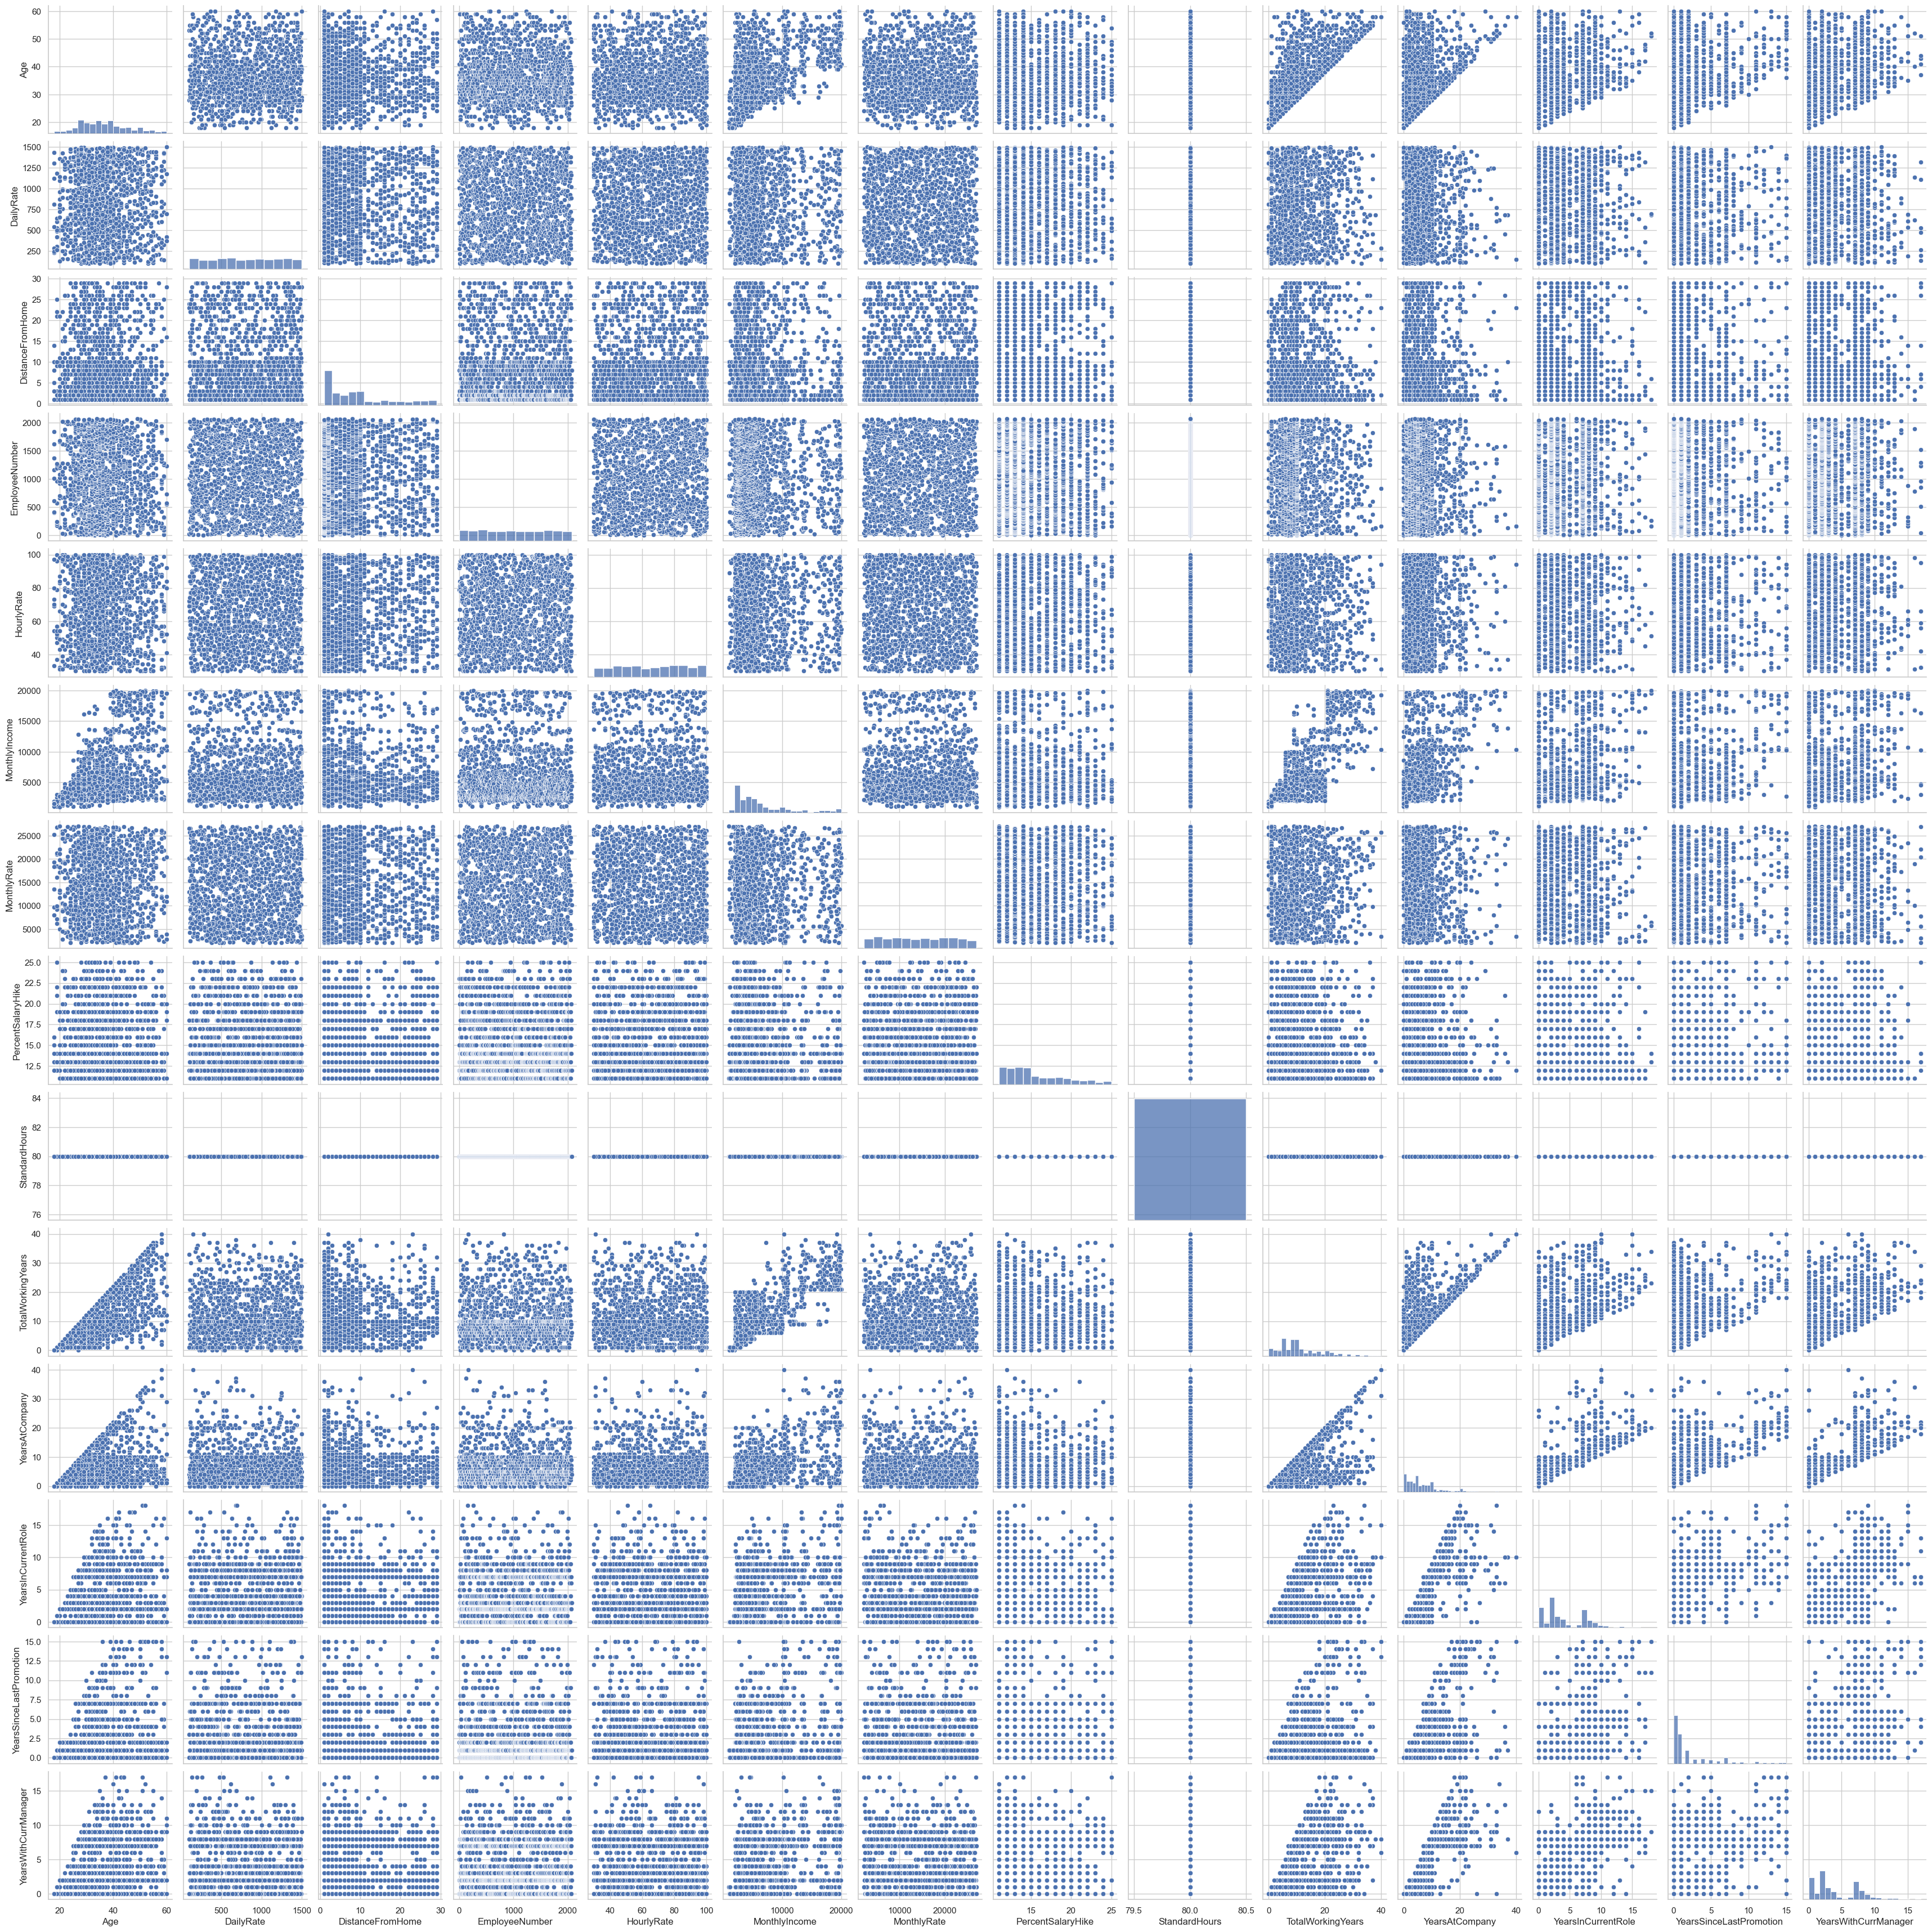

In [34]:
# Bivariate analysis using pairplot for numerical columns
plt.figure(figsize = (10, 12))
sns.pairplot(df[numerical_columns], palette = 'Dark2')
plt.show()

Pair plot, specifically focused on numerical variables, offers a comprehensive visual exploration of the relationships between different numerical features with each other. 

## Data Preprocessing

Columns such as 'EmployeeCount', 'EmployeeNumber', 'Over18' and 'StandardHours' do not provide relevant information for model building and predictive analysis. 

In [35]:
# Dropping 'EmployeeCount', 'EmployeeNumber', 'Over18' and 'StandardHours' columns
df.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace = True)

### Label Encoding

In [36]:
columns_for_encoding = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 
                        'OverTime']
encoder = LabelEncoder()
for i in columns_for_encoding:
    df[i] = encoder.fit_transform(df[i])

In [37]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

  Education  EducationField EnvironmentSatisfaction  Gender  ...  \
0         2               1                       2       0  ...   
1         1               1                       3       1  ...   
2         2               4                       4       1  ...   
3         4               1                       4       0  ...   
4         1               3                       1       1  ...   

   PerformanceRating RelationshipSatisfaction StockOptionLevel  \
0                  3                        1                0   
1                  4                        4                1   
2                  3                        2                0   
3                  3                        3                0   
4                  3                        4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                     0                1               6   
1                 10                     3                3              10   
2                  7                     3                3               0   
3                  8                     3                3               8   
4                  6                     3                3               2   

   YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                       0                     5  
1                   7                       1                     7  
2                   0                       0                     0  
3                   7                       3                     0  
4                   2                       2                     2  

[5 rows x 31 columns]

### Checking for the outliers

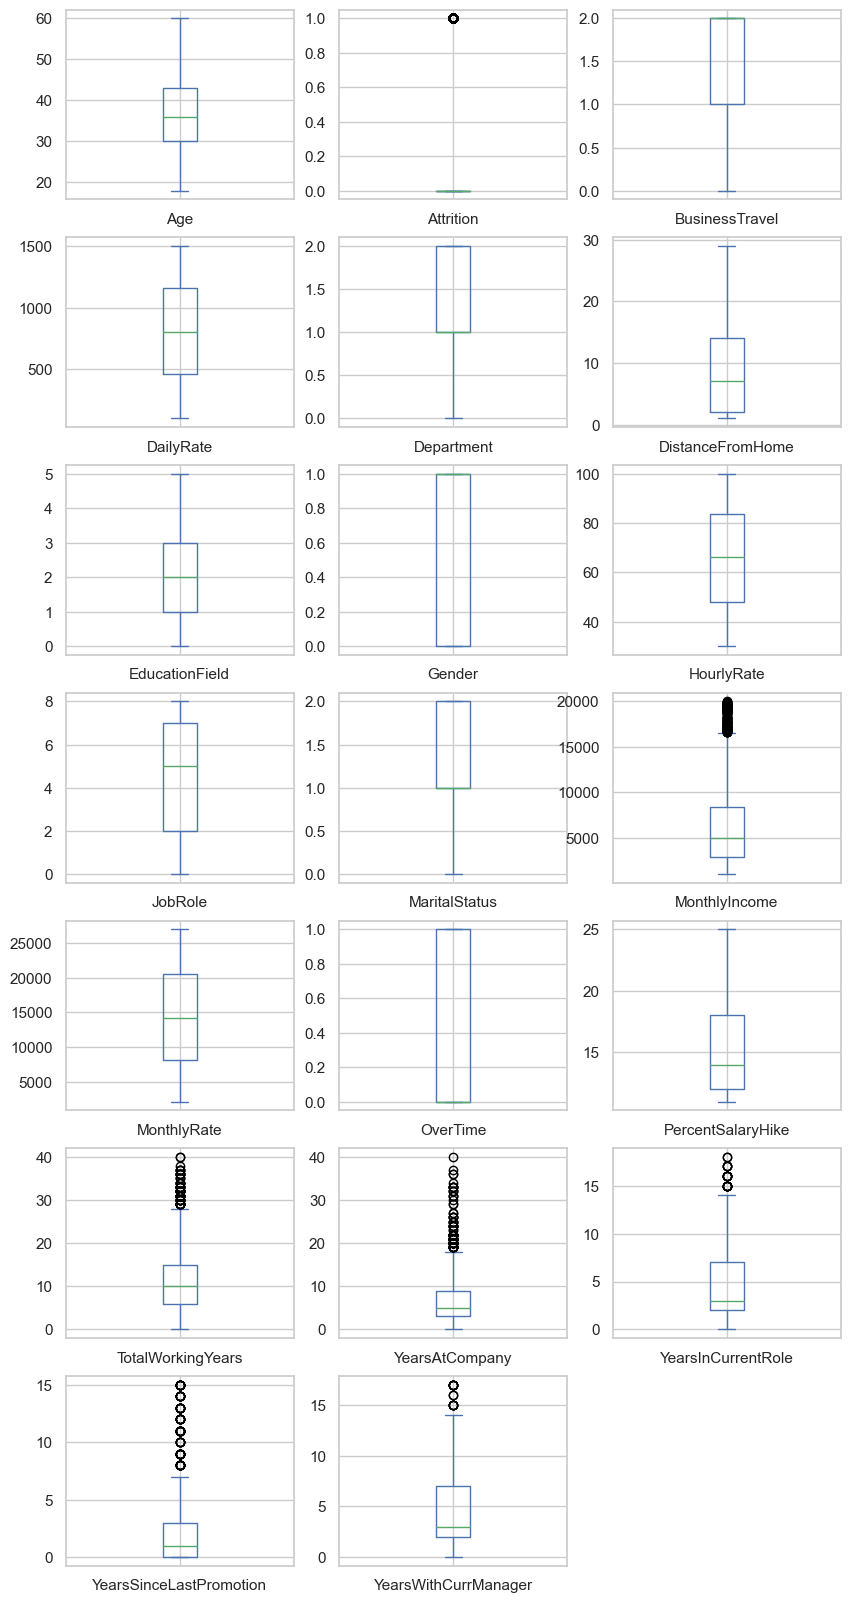

In [38]:
# Checking for the outliers using boxplot
df.plot(kind = 'box', subplots = True, figsize = (10, 35), layout = (12, 3))
plt.show()

Outliers are present in 'Attrition', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' columns but 'Attrition' contains categorical data so it will not be considered for outliers removal.

In [39]:
# List of columns containing outliers 
columns_with_outliers = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                        'YearsWithCurrManager']

In [40]:
# Checking for the outliers using zscore
z_score = abs(zscore(df[columns_with_outliers]))
z_score

MonthlyIncome  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
0          0.108350           0.421642        0.164613            0.063296   
1          0.291719           0.164511        0.488508            0.764998   
2          0.937654           0.550208        1.144294            1.167687   
3          0.763634           0.421642        0.161947            0.764998   
4          0.644858           0.678774        0.817734            0.615492   
...             ...                ...             ...                 ...   
1465       0.835451           0.735447        0.327893            0.615492   
1466       0.741140           0.293077        0.001333            0.764998   
1467       0.076690           0.678774        0.164613            0.615492   
1468       0.236474           0.735447        0.325228            0.488900   
1469       0.445978           0.678774        0.491174            0.339394   

      YearsSinceLastPromotion  YearsWithCurrManager  
0                    0.679146              0.245834  
1                    0.368715              0.806541  
2                    0.679146              1.155935  
3                    0.252146              1.155935  
4                    0.058285              0.595227  
...                       ...                   ...  
1465                 0.679146              0.314873  
1466                 0.368715              0.806541  
1467                 0.679146              0.314873  
1468                 0.679146              1.086895  
1469                 0.368715              0.595227  

[1470 rows x 6 columns]

In [41]:
# Identify the positions where the z-score is greater than 3
np.where(z_score > 3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([5, 4, 2, 4, 3, 4, 1, 1, 2, 4, 3, 4, 5, 1, 2, 4, 5, 4, 1, 5, 2, 3,
        4, 3, 5, 2, 4, 1, 2, 3, 4, 4, 5, 1, 2, 2, 4, 4, 1, 3, 2, 2, 4, 2,
        5, 4, 2, 1, 2, 4, 5, 1, 5, 2, 4, 2, 5, 4, 3, 3, 2, 4, 4, 4, 2, 4,
        4, 5, 1,

Outliers are present in these positions in the dataset.

In [42]:
# Removing Outliers
z = 3
updated_df = df[(z_score < z).all(axis = 1)]
updated_df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

     Education  EducationField EnvironmentSatisfaction  Gender  ...  \
0            2               1                       2       0  ...   
1            1               1                       3       1  ...   
2            2               4                       4       1  ...   
3            4               1                       4       0  ...   
4            1               3                       1       1  ...   
...        ...             ...                     ...     ...  ...   
1465         2               3                       3       1  ...   
1466         1               3                       4       1  ...   
1467         3               1                       2       1  ...   
1468         3               3                       4       1  ...   
1469         3               3                       2       1  ...   

      PerformanceRating RelationshipSatisfaction StockOptionLevel  \
0                     3                        1                0   
1                     4                        4                1   
2                     3                        2                0   
3                     3                        3                0   
4                     3                        4                1   
...                 ...                      ...              ...   
1465                  3                        3                1   
1466                  3                        1                1   
1467                  4                        2                1   
1468                  3                        4                0   
1469                  3                        1                0   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                     8                     0                1   
1                    10                     3                3   
2                     7                     3                3   
3                     8                     3                3   
4                     6                     3                3   
...                 ...                   ...              ...   
1465                 17                     3                3   
1466                  9                     5                3   
1467                  6                     0                3   
1468                 17                     3                2   
1469                  6                     3                4   

      YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0                  6                   4                       0   
1                 10                   7                       1   
2                  0                   0                       0   
3                  8                   7                       3   
4                  2                   2                       2   
...              ...                 ...                     ...   
1465               5                   2                       0   
1466          

In [43]:
# Checking the shape of dataframe after removing the outliers
updated_df.shape

(1387, 31)

### Checking for the skewness

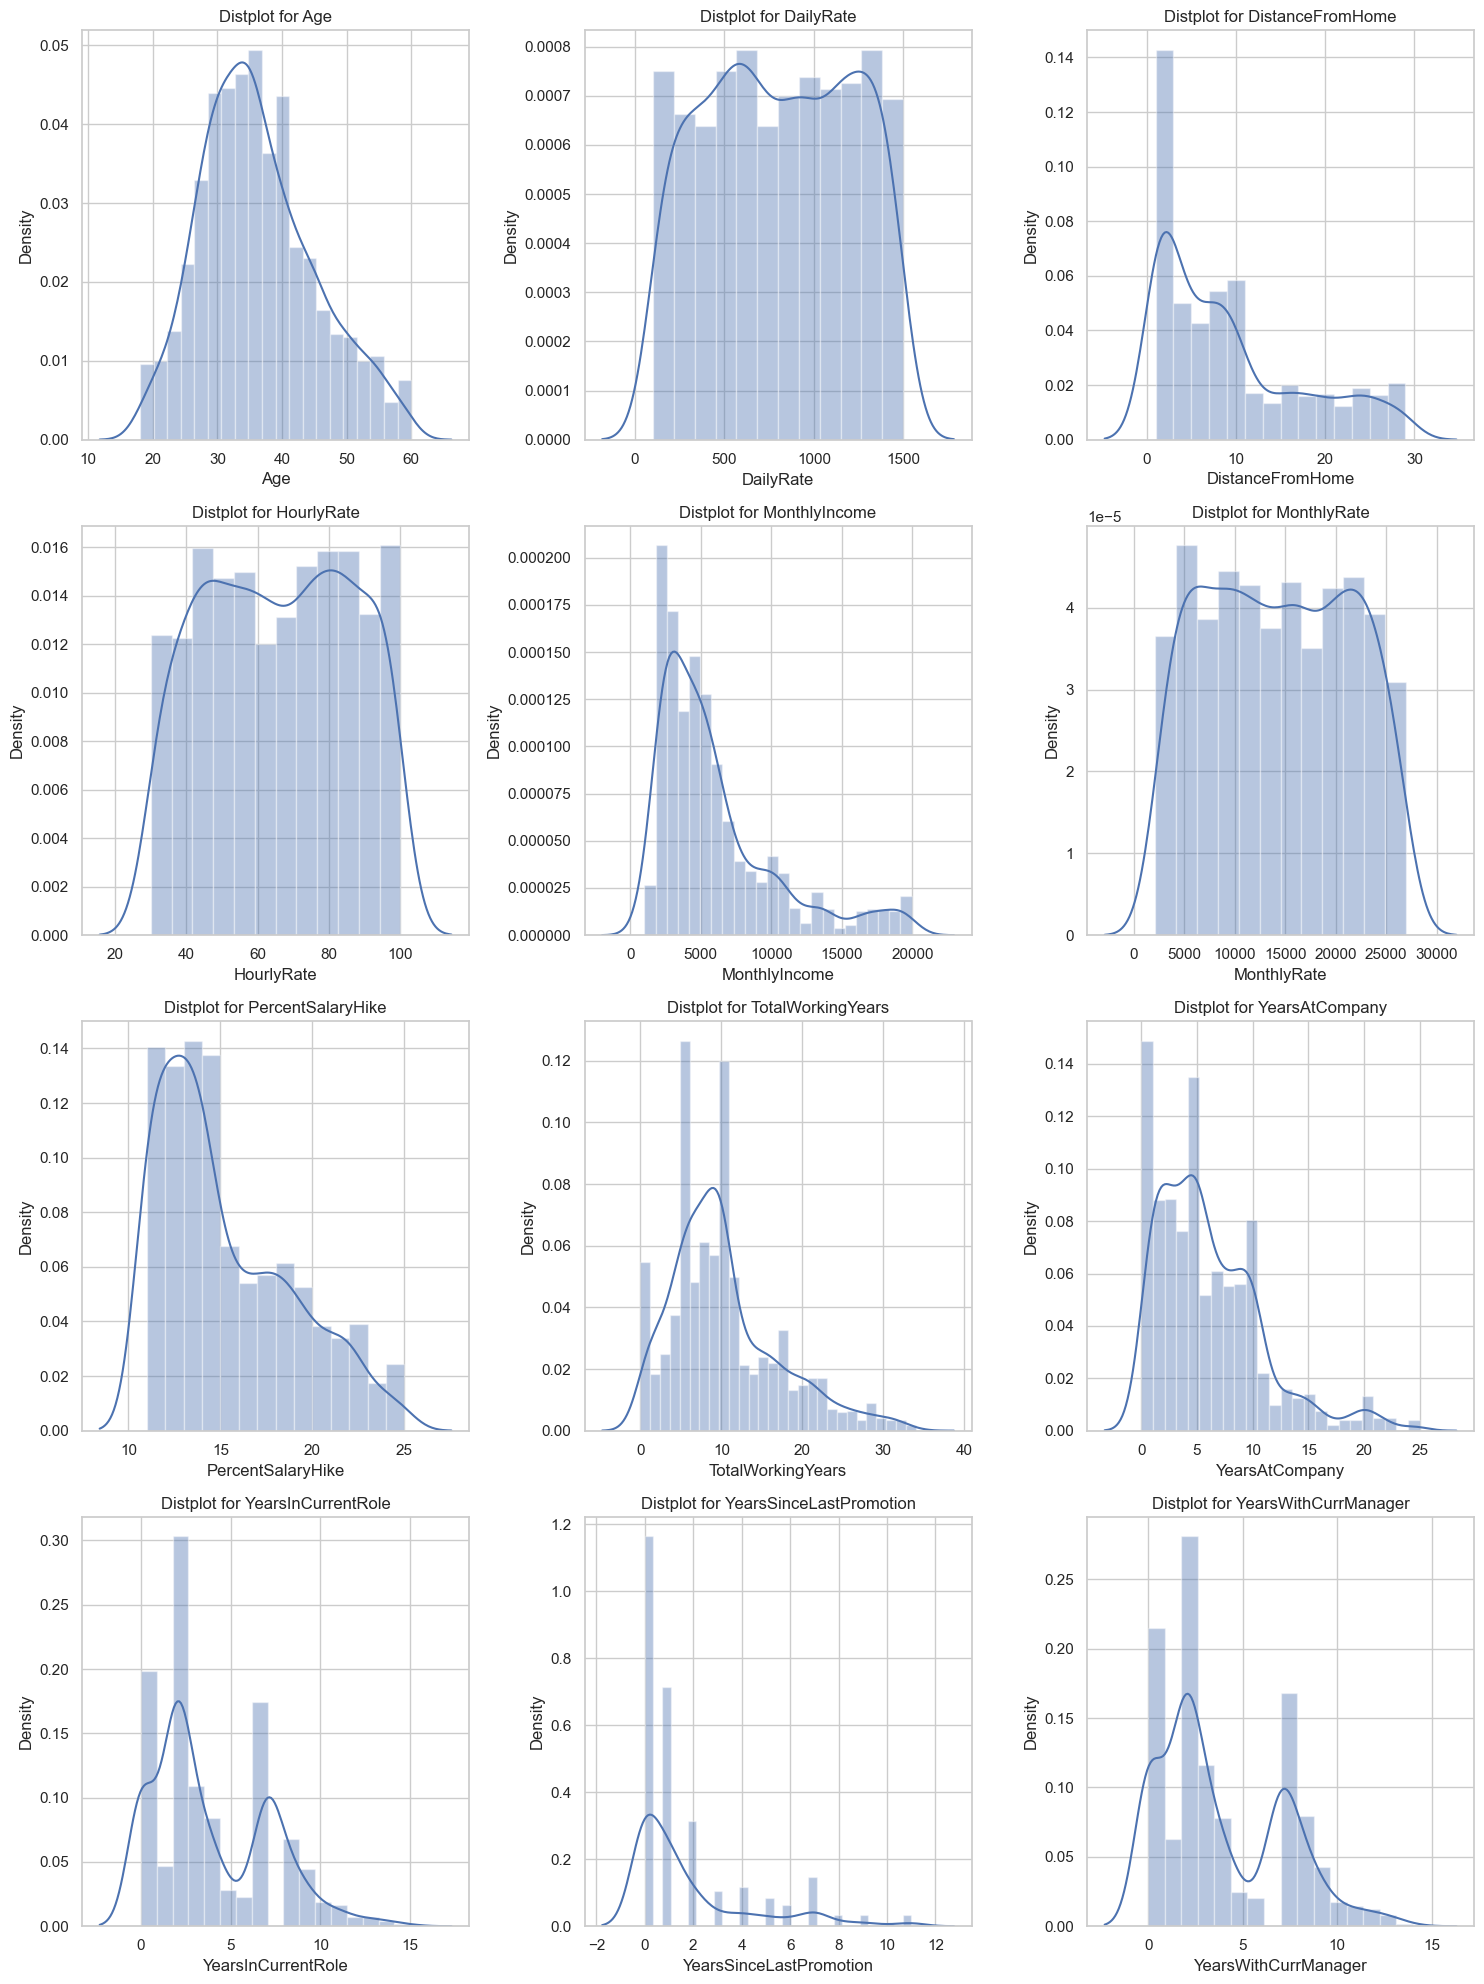

In [44]:
# Checking for the skewness using Dist plot 

# List of columns with numerical data
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 
                     'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                     'YearsWithCurrManager'] 
rows = 4
columns = 3
plt.figure(figsize = (15, 20))

for i in range(0, len(numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.distplot(updated_df[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

In majority of columns, skewness is present.

In [45]:
# Checking for the skewness using skew() method
updated_df[numerical_columns].skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

These are highly skewed columns:

DistanceFromHome (0.954752 - Positively skewed)

MonthlyIncome (1.544770 - Positively skewed)

PercentSalaryHike (0.800592 - Positively skewed)

TotalWorkingYears (1.034487 - Positively skewed)

YearsAtCompany (1.248623 - Positively skewed)

YearsInCurrentRole (0.726675 - Positively skewed)

YearsSinceLastPromotion (1.756335 - Positively skewed)

YearsWithCurrManager (0.694506 - Positively skewed)

In [46]:
# List of the columns to be transformed
columns_to_transform = ['DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 
                        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Copying data
updated_df2 = updated_df.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df[column] + 1)
    updated_df2[column] = transformed_data

In [47]:
updated_df2[columns_to_transform].skew()

DistanceFromHome           0.024938
MonthlyIncome              0.027739
PercentSalaryHike          0.116314
TotalWorkingYears         -0.008462
YearsAtCompany            -0.008315
YearsInCurrentRole        -0.021532
YearsSinceLastPromotion    0.283041
YearsWithCurrManager      -0.018611
dtype: float64

After the application of data transformation, the skewness in the distribution of the skewed columns has been effectively reduced, resulting in a more balanced and symmetric distribution.

In [48]:
updated_df2.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2          1.050658   
1   49          0               1        279           1          2.098585   
2   37          1               2       1373           1          1.310524   
3   33          0               1       1392           1          1.507919   
4   27          0               2        591           1          1.310524   

  Education  EducationField EnvironmentSatisfaction  Gender  ...  \
0         2               1                       2       0  ...   
1         1               1                       3       1  ...   
2         2               4                       4       1  ...   
3         4               1                       4       0  ...   
4         1               3                       1       1  ...   

   PerformanceRating RelationshipSatisfaction StockOptionLevel  \
0                  3                        1                0   
1                  4                        4                1   
2                  3                        2                0   
3                  3                        3                0   
4                  3                        4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           3.188584                     0                1        2.255768   
1           3.535688                     3                3        2.739422   
2           2.995623                     3                3        0.712040   
3           3.188584                     3                3        2.520067   
4           2.786285                     3                3        1.463245   

   YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0            1.980711                0.483154              2.120227  
1            2.485788                0.634088              2.421149  
2            0.720282                0.483154              0.714461  
3            2.485788                0.748878              0.714461  
4            1.497685                0.706611              1.473308  

[5 rows x 31 columns]

### Checking the Correlation Coefficient Matrix

In [49]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df2.corr()
correlation_coefficient

Age  Attrition  BusinessTravel  DailyRate  \
Age                      1.000000  -0.159366        0.022340   0.021946   
Attrition               -0.159366   1.000000       -0.001041  -0.057220   
BusinessTravel           0.022340  -0.001041        1.000000  -0.004606   
DailyRate                0.021946  -0.057220       -0.004606   1.000000   
Department              -0.038242   0.063637       -0.003521  -0.005398   
DistanceFromHome        -0.028609   0.081244       -0.015783  -0.003932   
EducationField          -0.032676   0.023585        0.022576   0.040645   
Gender                  -0.039430   0.036252       -0.025364  -0.005242   
HourlyRate               0.025465  -0.001532        0.025424   0.014279   
JobRole                 -0.112957   0.064283        0.000213  -0.015437   
MaritalStatus           -0.104372   0.160960        0.018687  -0.074113   
MonthlyIncome            0.436541  -0.207278        0.028385   0.029530   
MonthlyRate              0.026954   0.014888       -0.010307  -0.029844   
OverTime                 0.034180   0.257237        0.022378   0.020294   
PercentSalaryHike        0.013240  -0.017458       -0.027882   0.028739   
TotalWorkingYears        0.634230  -0.220470        0.031147   0.043085   
YearsAtCompany           0.173046  -0.201564       -0.022182   0.005552   
YearsInCurrentRole       0.119011  -0.186029       -0.032595   0.020268   
YearsSinceLastPromotion  0.105292  -0.049928       -0.027390  -0.035092   
YearsWithCurrManager     0.115596  -0.184429       -0.033998   0.006186   

                         Department  DistanceFromHome  EducationField  \
Age                       -0.038242         -0.028609       -0.032676   
Attrition                  0.063637          0.081244        0.023585   
BusinessTravel            -0.003521         -0.015783        0.022576   
DailyRate                 -0.005398         -0.003932        0.040645   
Department                 1.000000          0.037009        0.013432   
DistanceFromHome           0.037009          1.000000        0.011398   
EducationField             0.013432          0.011398        1.000000   
Gender                    -0.030618          0.010283        0.010676   
HourlyRate                -0.002412          0.015571       -0.006539   
JobRole                    0.678627          0.008879        0.017492   
MaritalStatus              0.052086         -0.027647        0.012073   
MonthlyIncome              0.154061          0.000657       -0.032708   
MonthlyRate                0.022741          0.048895       -0.023384   
OverTime                   0.014908          0.036206        0.007912   
PercentSalaryHike         -0.015357          0.035021       -0.005826   
TotalWorkingYears         -0.007561         -0.011502       -0.008444   
YearsAtCompany             0.027491          0.007385        0.003125   
YearsInCurrentRole         0.059006          0.013488        0.002034   
YearsSinceLastPromotion    0.019557         -0.003907        0.019946   
YearsWithCurrManager       0.024721         -0.002041        0.025319   

                           Gender  HourlyRate   JobRole  MaritalStatus  \
Age                     -0.039430    0.025465 -0.112957      -0.104372   
Attrition                0.036252   -0.001532  0.064283       0.160960   
BusinessTravel          -0.025364    0.025424  0.000213       0.018687   
DailyRate               -0.005242    0.014279 -0.015437      -0.074113   
Department              -0.030618   -0.002412  0.678627       0.052086   
DistanceFromHome         0.010283    0.015571  0.008879      -0.027647   
EducationField           0.010676   -0.006539  0.017492       0.012073   
Gender                   1.000000    0.004768 -0.036831      -0.056786   
HourlyRate               0.004768    1.000000 -0.024404      -0.007768   
JobRole                 -0.036831   -0.024404  1.000000       0.063149   
MaritalStatus           -0.056786   -0.007768  0.063149       1.000000   
MonthlyIncome           -0.05233

Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

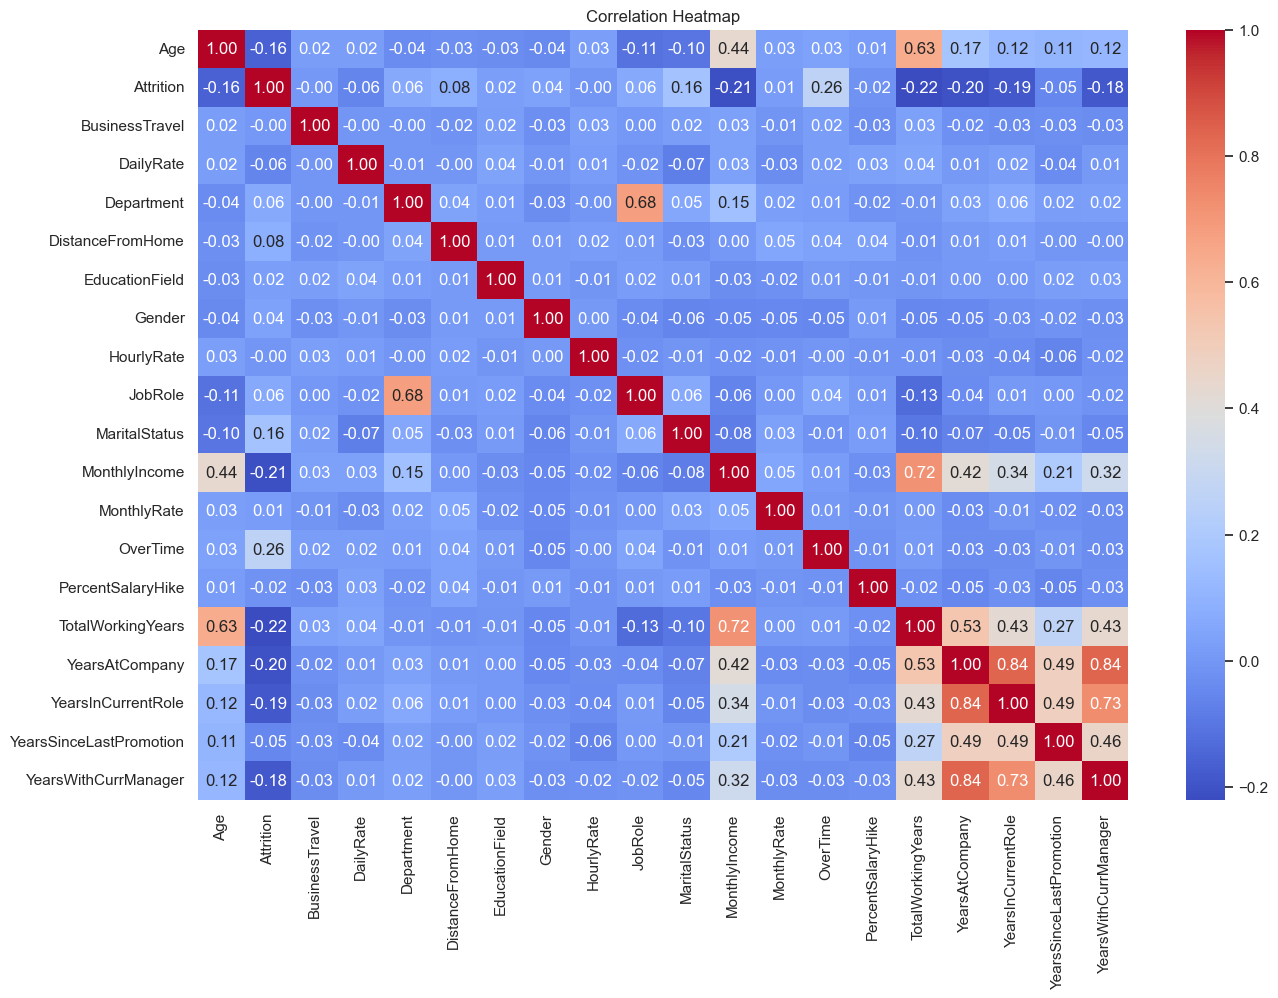

In [50]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Observations:

Age has a strong positive correlation (0.634) with TotalWorkingYears, indicating that as employees get older, they tend to have more working experience.

MonthlyIncome is positively correlated (0.437) with Age, suggesting that older employees tend to have higher incomes.

There is a moderate positive correlation (0.533) between TotalWorkingYears and YearsAtCompany, indicating that employees who have worked longer tend to stay with the company for a longer duration.

YearsAtCompany is highly correlated (0.838) with YearsWithCurrManager, suggesting that employees who have been with the company for a long time often have the same manager throughout their tenure.

Attrition is negatively correlated (-0.207) with MonthlyIncome, indicating that employees with lower incomes are more likely to leave the company.

Attrition is positively correlated (0.257) with Overtime, suggesting that employees who work overtime are more likely to leave the company.

MaritalStatus is positively correlated (0.161) with Attrition, implying that marital status may influence employee attrition.

Department has a moderate positive correlation (0.678) with JobRole, indicating that certain departments are associated with specific job roles.

Gender is negatively correlated (-0.037) with MaritalStatus, suggesting that gender may be related to marital status.

PercentSalaryHike has a weak negative correlation (-0.022) with Attrition, indicating a slight influence of salary hikes on attrition.

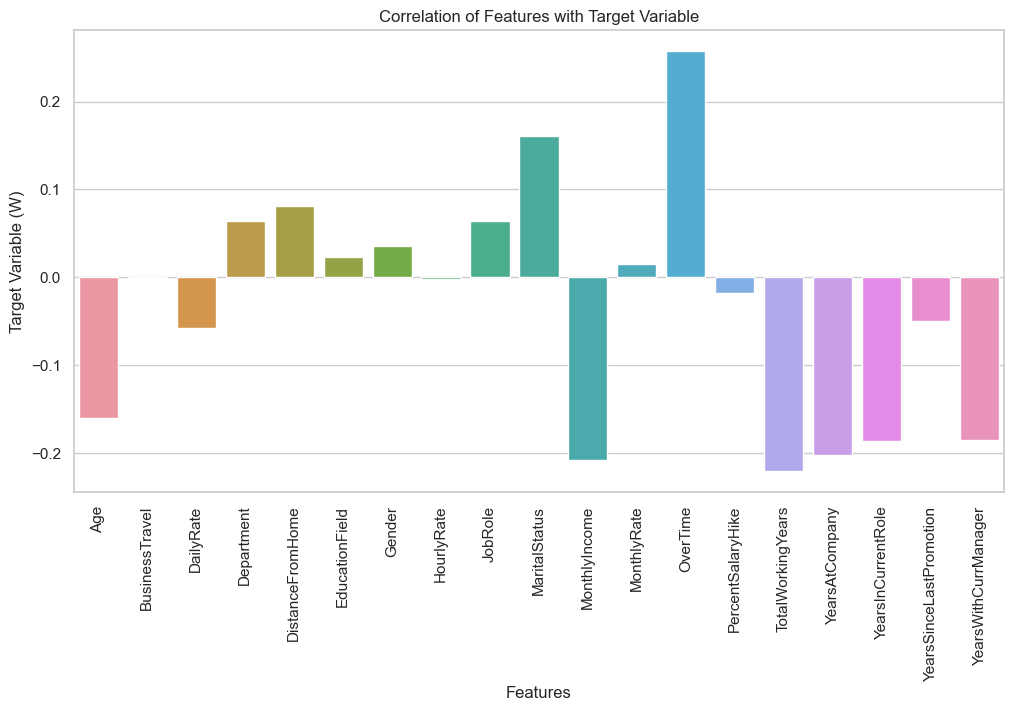

In [51]:
# Checking for the correlation between features and target variable separately
target = 'Attrition'

correlation_matrix = updated_df2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (W)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation=90)

plt.show()

Here's a concise overview of the correlations between the dependent variable (Attrition) and each independent variable along with their corresponding values:

Age: Slightly negative correlation (-0.159)

BusinessTravel: Minimal correlation (-0.001)

DailyRate: Slightly negative correlation (-0.057)

Department: Slight positive correlation (0.064)

DistanceFromHome: Slight positive correlation (0.081)

EducationField: Minor positive correlation (0.024)

Gender: Slight positive correlation (0.036)

HourlyRate: Negligible correlation (-0.002)

JobRole: Slight positive correlation (0.064)

MaritalStatus: Moderate positive correlation (0.161)

MonthlyIncome: Moderate negative correlation (-0.207)

MonthlyRate: Minor positive correlation (0.015)

OverTime: Moderate positive correlation (0.257)

PercentSalaryHike: Weak negative correlation (-0.017)

TotalWorkingYears: Moderate negative correlation (-0.220)

YearsAtCompany: Moderate negative correlation (-0.202)

YearsInCurrentRole: Moderate negative correlation (-0.186)

YearsSinceLastPromotion: Weak negative correlation (-0.050)

YearsWithCurrManager: Moderate negative correlation (-0.184)

## Feature Engineering

In [52]:
# Extracting features and target from the dataset
features = updated_df2.drop(columns = 'Attrition')
target = updated_df2['Attrition']

### Feature Scaling

In [53]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [54]:
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.536681        0.593126   0.734325    1.405373         -1.460355   
1  1.442111       -0.905354  -1.307769   -0.496337          0.236267   
2  0.083966        0.593126   1.406752   -0.496337         -1.039624   
3 -0.368749       -0.905354   1.453896   -0.496337         -0.720036   
4 -1.047821        0.593126  -0.533609   -0.496337         -1.039624   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.876177       -0.940815                -0.665328 -1.229911    1.388670   
1  -1.853858       -0.940815                 0.251978  0.813067   -0.239091   
2  -0.876177        1.305159                 1.169285  0.813067    1.290017   
3   1.079185       -0.940815                 1.169285 -1.229911   -0.485721   
4  -1.853858        0.556501                -1.582635  0.813067   -1.274939   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...          -0.424765                 -1.575817         -0.929427   
1  ...           2.354241                  1.199034          0.238250   
2  ...          -0.424765                 -0.650866         -0.929427   
3  ...          -0.424765                  0.274084         -0.929427   
4  ...          -0.424765                  1.199034          0.238250   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173330              -2.171420        -2.501172        0.235081   
1           0.151976               0.151871         0.336558        0.960159   
2          -0.354174               0.151871         0.336558       -2.079227   
3          -0.173330               0.151871         0.336558        0.631308   
4          -0.550366               0.151871         0.336558       -0.953045   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.286182                -1.055723              0.584859  
1            1.018997                 0.138797              1.030842  
2           -1.542568                -1.055723             -1.498558  
3            1.018997                 1.047272             -1.498558  
4           -0.414638                 0.712758             -0.373907  

[5 rows x 30 columns]

### Checking for the Variance Inflation Factor

In [55]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                    Features       VIF
0                        Age  1.868058
1             BusinessTravel  1.012962
2                  DailyRate  1.024798
3                 Department  2.050429
4           DistanceFromHome  1.015117
5                  Education  1.063253
6             EducationField  1.019336
7    EnvironmentSatisfaction  1.025131
8                     Gender  1.024668
9                 HourlyRate  1.021824
10            JobInvolvement  1.020627
11                  JobLevel  5.311910
12                   JobRole  1.984024
13           JobSatisfaction  1.023989
14             MaritalStatus  1.842462
15             MonthlyIncome  5.348053
16               MonthlyRate  1.020275
17        NumCompaniesWorked  1.330479
18                  OverTime  1.031205
19         PercentSalaryHike  1.760471
20         PerformanceRating  1.749808
21  RelationshipSatisfaction  1.023022
22          StockOptionLevel  1.818071
23         TotalWorkingYears  4.074349
24     TrainingTimesLastY

Every feature has less VIF value.

## Model Building

In [56]:
# Storing features and target in X and y
X1 = updated_features
y1 = target

### Checking for the class imbalnce problem

In [57]:
y1.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Class imbalance issue is present in the dataset.

In [58]:
# Fixing class imbalance problem using oversampling method
sm = SMOTE()
X, y = sm.fit_resample(X1, y1)

In [59]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

### Finding a best random state

In [60]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 100):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        rfc = RandomForestClassifier(random_state = i)
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.9539568345323741 at random state 64


### Spliting dataset into training and testing sets

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

### List of different models

In [62]:
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier']

In [63]:
models = [LogisticRegression(), 
          KNeighborsClassifier(), 
          GaussianNB(),
          SVC(), 
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          ExtraTreesClassifier(), 
          GradientBoostingClassifier(), 
          AdaBoostClassifier(), 
          BaggingClassifier(),
          xgb.XGBClassifier()]

In [64]:
models_accuracy_score = []  # List for storing accuracy score of different models
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 80.0
Classifiction report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       357
           1       0.79      0.80      0.79       338

    accuracy                           0.80       695
   macro avg       0.80      0.80      0.80       695
weighted avg       0.80      0.80      0.80       695

Confusion matrix:
 [[287  70]
 [ 69 269]]



K-Nearest Neighbors
Accuracy score: 78.99280575539568
Classifiction report:
               precision    recall  f1-score   support

           0       0.96      0.61      0.75       357
           1       0.71      0.98      0.82       338

    accuracy                           0.79       695
   macro avg       0.83      0.79      0.78       695
weighted avg       0.84      0.79      0.78       695

Confusion matrix:
 [[219 138]
 [  8 330]]



Gaussian Naive Bayes
Accuracy score: 71.79856115107913
Classifiction report:
               precision    recall  f1

Logistic Regression has an accuracy score of 80.0%, showing decent performance in classifying data into two classes (0 and 1). It has balanced precision and recall for both classes, indicating that it's making reasonably accurate predictions for both positive and negative cases.

K-Nearest Neighbors (KNN) achieved an accuracy score of 78.99%. KNN has a high precision for class 0 (96%) but relatively lower precision for class 1 (71%). However, it has a perfect recall for class 1, which means it's excellent at capturing all true positive cases for class 1 but less precise in doing so.

Gaussian Naive Bayes has an accuracy score of 71.80%. It shows a relatively balanced precision and recall for both classes, which is good for a probabilistic classifier.

Support Vector Classifier (SVC) stands out with an impressive accuracy score of 91.51%. It excels in both precision and recall for both classes, indicating strong performance in distinguishing between the two classes.

Decision Tree Classifier achieved an accuracy score of 86.04% with balanced precision and recall values for both classes. It's a robust choice for classification tasks.

Random Forest Classifier has an accuracy score of 95.40%. This ensemble method performs exceptionally well in both precision and recall for both classes, making it a strong candidate for classification tasks.

Extra Trees Classifier also exhibits high accuracy at 96.83%. It maintains a strong balance between precision and recall for both classes, further highlighting its strong performance.

Gradient Boosting Classifier has an accuracy score of 92.95% with balanced precision and recall values, demonstrating good overall performance.

AdaBoost Classifier achieved an accuracy score of 90.36% and shows balanced precision and recall values for both classes, making it a reliable choice.

Bagging Classifier has an accuracy score of 90.79% with balanced precision and recall values, demonstrating strong performance.

XGBoost Classifier also achieved an accuracy score of 93.53% with balanced precision and recall values for both classes, making it a competitive choice for classification tasks.

## Cross Validation 

In [65]:
i = 0
diff_acc_cv = []  # List for storing the difference of the accuracy score and mean of cross validaion scores of each model
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 80.0
Cross Validation Scores: [79.74137931 80.56155508 80.12958963 75.59395248 79.04967603]
Mean of Cross Validation Scores: 79.01523050569749
Difference between Accuracy Score and Cross Validation Score: 0.9847694943025118


K-Nearest Neighbors
Accuracy Score: 78.99280575539568
Cross Validation Scores: [78.23275862 85.09719222 82.50539957 79.91360691 79.48164147]
Mean of Cross Validation Scores: 81.04611975869517
Difference between Accuracy Score and Cross Validation Score: -2.0533140032994908


Gaussian Naive Bayes
Accuracy Score: 71.79856115107913
Cross Validation Scores: [68.31896552 74.51403888 72.57019438 71.7062635  71.49028078]
Mean of Cross Validation Scores: 71.71994861100768
Difference between Accuracy Score and Cross Validation Score: 0.0786125400714468


Support Vector Classifier
Accuracy Score: 91.51079136690647
Cross Validation Scores: [89.22413793 92.44060475 92.65658747 90.49676026 93.08855292]
Mean of Cross Validation Scores: 91.581

Random Forest Classifier achieved the highest accuracy score among the models, demonstrating its excellent fit to the training data. However, it's essential to consider the difference between the accuracy score and the mean of the cross-validation scores. The Random Forest Classifier has a relatively higher difference compared to some other models, implying potential overfitting to the training data.

In light of both the accuracy score and the difference from cross-validation scores, a more balanced choice is the Support Vector Classifier (SVC). With an accuracy score of 91.51%, the SVC exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at -0.07%, suggesting that the model maintains stability and reliability. 

In [66]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                  'Accurccy Score': models_accuracy_score, 
                  'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [67]:
models_performance

Model  Accurccy Score  \
0            Logistic Regression       80.000000   
1            K-Nearest Neighbors       78.992806   
2           Gaussian Naive Bayes       71.798561   
3      Support Vector Classifier       91.510791   
4       Decision Tree Classifier       86.043165   
5       Random Forest Classifier       95.395683   
6         Extra Trees Classifier       96.834532   
7   Gradient Boosting Classifier       92.949640   
8            AdaBoost Classifier       90.359712   
9             Bagging Classifier       90.791367   
10            XGBoost Classifier       93.525180   

    Difference: Accuracy Score & CV Score  
0                                0.984769  
1                               -2.053314  
2                                0.078613  
3                               -0.070537  
4                                1.020171  
5                                1.650059  
6                               -0.015378  
7                                4.594181  
8                                3.087053  
9                                0.671459  
10                               3.832117

## Final Model
After careful evaluation, the Support Vector Classifier stands out as the best model and will serve as with an accuracy score of 91.51%, the SVC exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at -0.07%, suggesting that the model maintains stability and reliability. This balance between accuracy and stability makes the Support Vector Classifier a prudent choice for the final model.

### Hyper Parameter Tuning

In [68]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type: linear or radial basis function (RBF)
    'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf' kernel
    'degree': [2, 3, 4]}           # Degree of the polynomial kernel

In [69]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(SVC(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [70]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [71]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [72]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [73]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.7581120284805334

In [74]:
# Creating final model
final_model = SVC(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

94.67625899280576


### Plotting AUC-ROC Curve

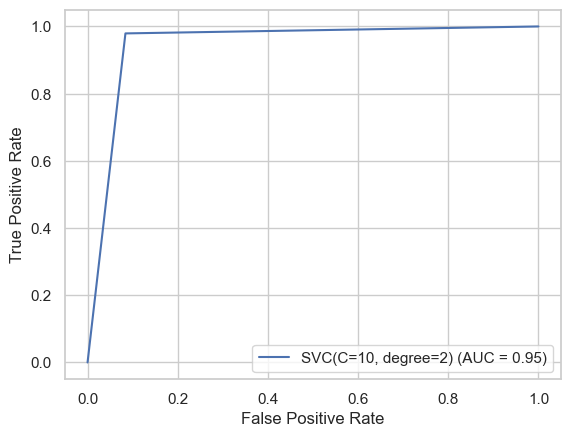

In [75]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()
plt.show()

## Saving the final model

In [76]:
# Saving the model 
joblib.dump(final_model, "HR_Analytics_Employee_Attrition.pkl")

['HR_Analytics_Employee_Attrition.pkl']

In [77]:
# Loading the saved model
model = joblib.load("HR_Analytics_Employee_Attrition.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [78]:
# Saving the actual values
actual_values = np.array(y_test)

In [79]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

Actual Vlaues  Predicted Values
0                1                 1
1                1                 1
2                1                 1
3                1                 1
4                0                 0
..             ...               ...
690              0                 0
691              0                 0
692              1                 1
693              0                 0
694              0                 0

[695 rows x 2 columns]

## HR Analytics- Employee Attrition Project Documentation

### Project Overview


### Objective
The objective of the HR Analytics Employee Attrition Project is to analyze employee data and develop a predictive model to identify factors contributing to employee attrition within an organization. This project aims to assist HR professionals in understanding and mitigating employee turnover, ultimately improving workforce retention strategies.

### Data Source
The dataset used for this project is sourced from a CSV file containing information about employees, their roles, job satisfaction, performance metrics, and whether they left the organization (attrition status).

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance model performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate model performance. The typical split is 70% for training and 30% for testing.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
#### Model Selection
Several machine learning models were employed to predict employee attrition, including:
'Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier'.

Each model mentioned above was trained on the training dataset.

#### Model Evaluation Metrics
The following evaluation metrics were used to assess model performance:

Accuracy: Measures the proportion of correctly classified employee attrition cases.

Precision: Evaluates the model's ability to correctly predict attrition when it occurs.

Recall: Measures the model's ability to identify all actual attrition cases.

F1-Score: Combines precision and recall to provide a balanced measure of model performance.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Assesses the model's ability to distinguish between attrition and non-attrition cases.

### Model Evaluation and Hyperparameter Tuning
#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above. Visual representations, such as confusion matrices or ROC curves, were used to aid in model selection.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize model performance.

### Results
#### Final Model Selection
After careful evaluation, the Support Vector Classifier model was selected as the final model for predicting employee attrition due to its superior performance.

### Key Findings
One notable finding from the analysis is that job satisfaction, as indicated by employee survey responses, emerged as a critical factor influencing employee attrition. Employees with lower job satisfaction levels were significantly more likely to leave the organization. This underscores the importance of enhancing job satisfaction through targeted HR initiatives to mitigate attrition and improve employee retention.

### Conclusion
In conclusion, the HR Analytics Employee Attrition Project aims to address the challenge of employee turnover by leveraging machine learning models. By analyzing  employee data and implementing predictive models, HR professionals can make informed decisions and implement strategies to enhance workforce retention within the organization.